## Setup, Loading Data and CDFs

In [1]:
DATA_NAME = 'segmentAnything-indoor' 
TRANSFORM = 'wavelet-horizontal'
CHANNEL = ''

In [6]:
path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
if CHANNEL:
    path_list.append(CHANNEL)
print(f"Name the notebook:\n{'_'.join(path_list[::-1])}.ipynb")

Name the notebook:
horizontal_wavelet_indoor_segmentAnything.ipynb


In [28]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)

assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if TRANSFORM.split("-")[0] == 'wavelet' else ('band' if TRANSFORM.split("-")[0] == 'fourier' else 'error')
RERUN = False
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\segmentAnything\\wavelet\\horizontal\\gray'

In [29]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [6]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

if path_dict['transform'] == 'fourier':
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
elif path_dict['transform'] == 'wavelet':
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)

cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::1000] for g in GROUPS} # For quick testing purposes
group_total_samples

{2: 31800,
 3: 22260,
 4: 44520,
 5: 41340,
 6: 50880,
 7: 54060,
 8: 66780,
 9: 63600,
 10: 85860,
 11: 104940,
 12: 111300,
 13: 136740,
 14: 162180,
 15: 187620,
 16: 203520,
 17: 257580,
 18: 289380,
 19: 337080,
 20: 381600,
 21: 470640,
 22: 540600,
 23: 610560,
 24: 712320,
 25: 855420,
 26: 973080,
 27: 1154340,
 28: 1316520,
 29: 1376940,
 30: 960360,
 31: 674160,
 32: 419760,
 33: 162180}

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:582: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar power
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


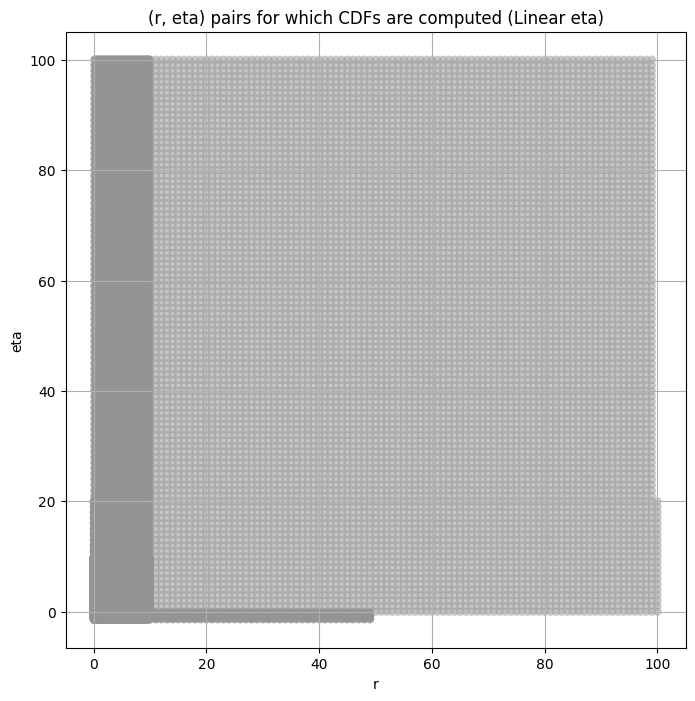

(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

In [7]:
#warnings.filterwarnings('ignore', category=RuntimeWarning)

all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
temp_cdf = all_cdfs_df
create_scatter_plot(all_cdfs_df);
all_cdfs_df.head()

## Bootstrapping the Variance and Kurtosis

In [8]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99

In [9]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not master_df_var_kurt_path.exists():
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Band 2


100%|██████████| 100000/100000 [06:50<00:00, 243.89it/s]


Band 5


100%|██████████| 100000/100000 [04:11<00:00, 397.31it/s]


Band 8


100%|██████████| 100000/100000 [04:04<00:00, 409.80it/s]


Band 11


100%|██████████| 100000/100000 [03:53<00:00, 427.50it/s]


Band 14


100%|██████████| 100000/100000 [04:14<00:00, 393.36it/s]


Band 17


100%|██████████| 100000/100000 [04:12<00:00, 396.72it/s]


Band 20


100%|██████████| 100000/100000 [04:16<00:00, 389.47it/s]


Band 23


100%|██████████| 100000/100000 [04:07<00:00, 404.75it/s]


Band 26


100%|██████████| 100000/100000 [04:16<00:00, 389.52it/s]


Band 29


100%|██████████| 100000/100000 [04:00<00:00, 415.12it/s]


Band 32


100%|██████████| 100000/100000 [04:16<00:00, 390.20it/s]


obs_var      var_lower     var_upper   obs_kurt  kurt_lower  \
band                                                                     
2     166042.38000  157998.030000  174433.44000   1.621352    1.183683   
5      88873.20000   84620.586000   93301.83600   1.556881    1.034867   
8      48739.90600   46426.742000   51128.37000   1.541575    1.065818   
11     27771.78000   26384.787000   29233.97300   1.922300    1.152667   
14     15175.32700   14446.183000   15943.68400   1.705795    1.083743   
17      8489.96700    8074.939500    8925.65700   1.771588    1.108579   
20      4270.11670    4059.782000    4497.97460   1.956200    1.143715   
23      2001.44800    1901.448400    2108.50070   2.041856    1.252694   
26       805.73254     756.140140     869.27690   5.035482    1.824682   
29       254.74072     229.878480     294.46872  20.922686    4.499840   
32        21.90403      20.869366      22.97642   1.474466    0.992683   

      kurt_upper  total_samples  
band                             
2       2.159779        31800.0  
5       2.247035        41340.0  
8       2.175573        66780.0  
11      3.322009       104940.0  
14      3.005845       162180.0  
17      3.490519       257580.0  
20      5.900508       381600.0  
23      3.881752       610560.0  
26     19.982931       973080.0  
29     88.633370      1376940.0  
32      2.485555       419760.0

## Initial Grid Search and Hypothesis Test Plots

####
Band  2


100%|██████████| 55966/55966 [06:53<00:00, 135.26it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 31800, Without approximation : 31800.0


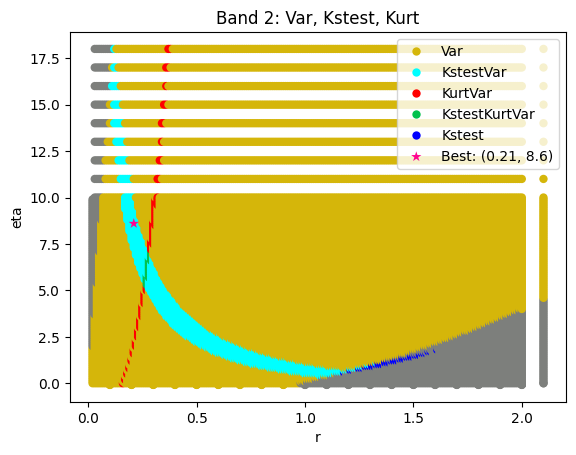

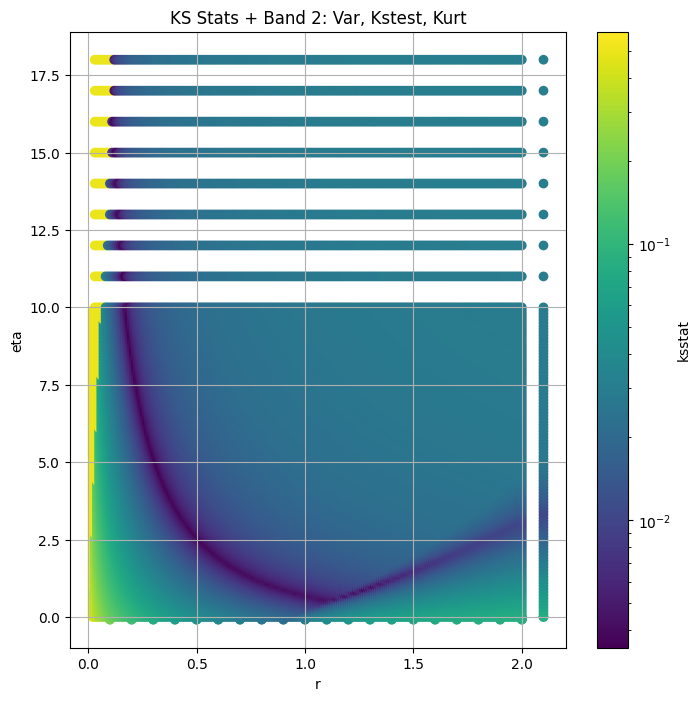

####
Band  5


100%|██████████| 55966/55966 [07:58<00:00, 116.90it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 41340, Without approximation : 41340.0


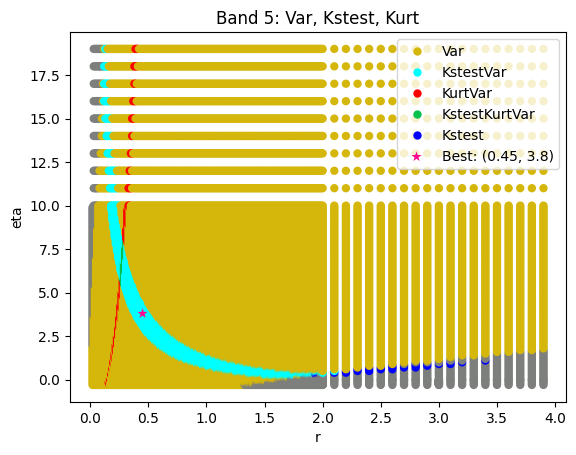

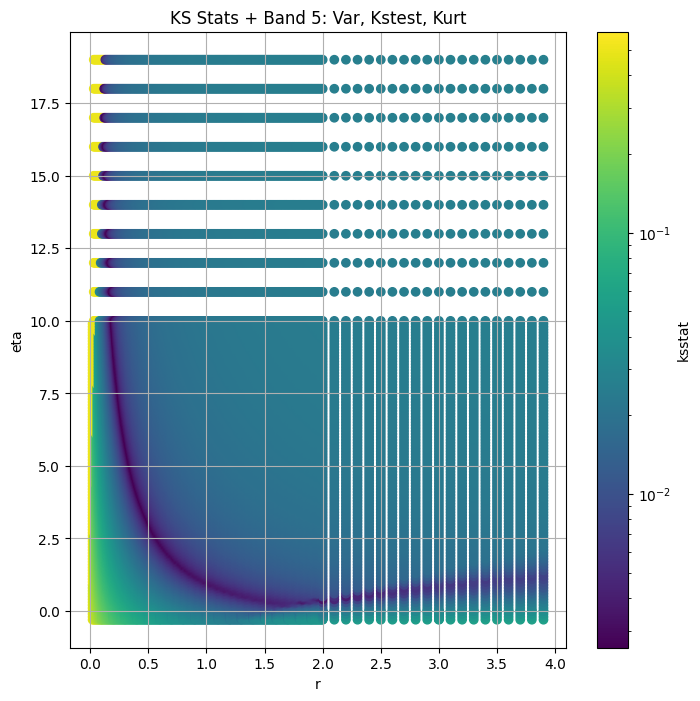

####
Band  8


100%|██████████| 55966/55966 [12:17<00:00, 75.88it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 66780, Without approximation : 66780.0


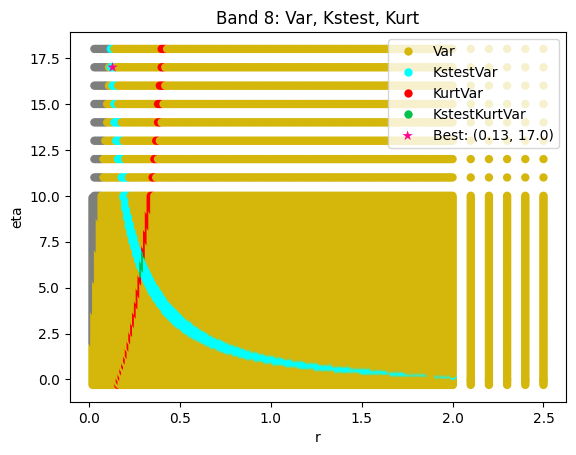

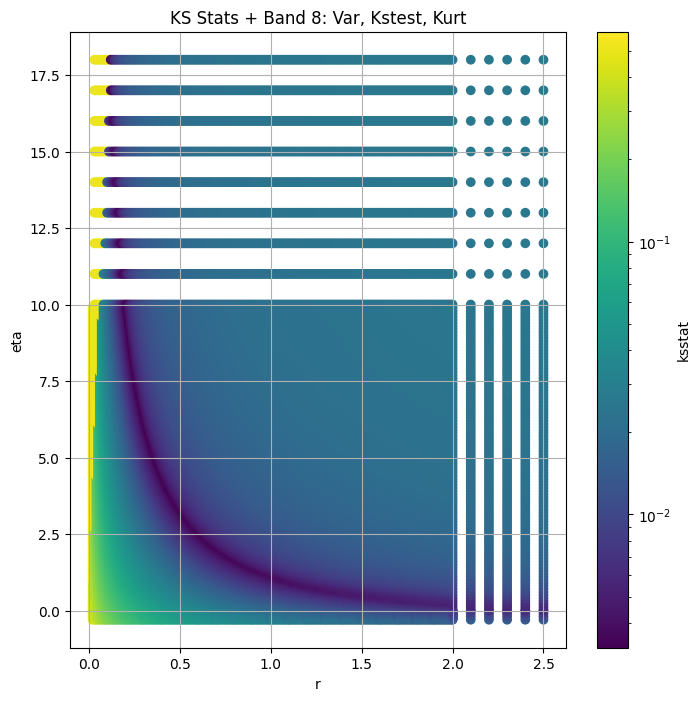

####
Band  11


100%|██████████| 55966/55966 [17:33<00:00, 53.11it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 104940.0


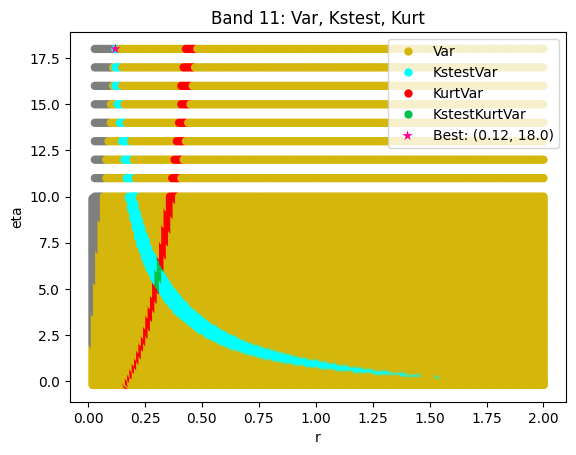

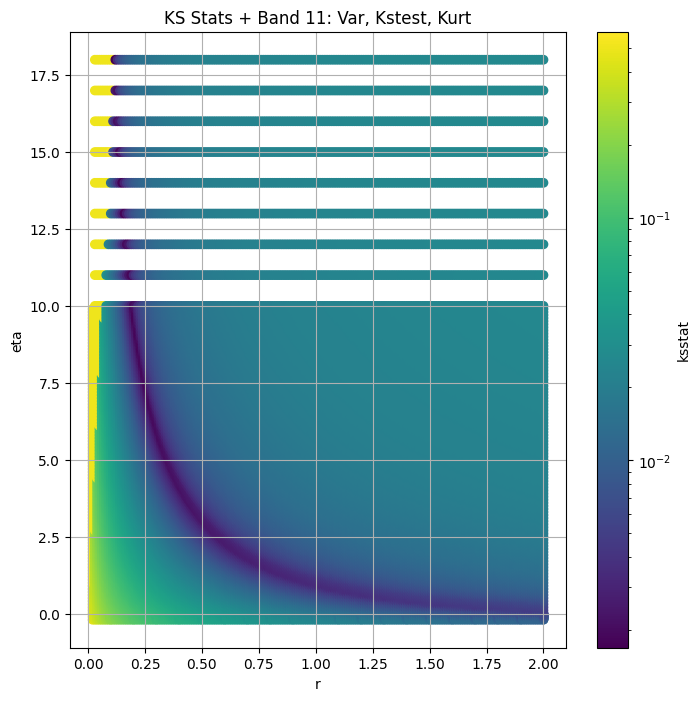

####
Band  14


100%|██████████| 55966/55966 [17:29<00:00, 53.32it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 162180.0


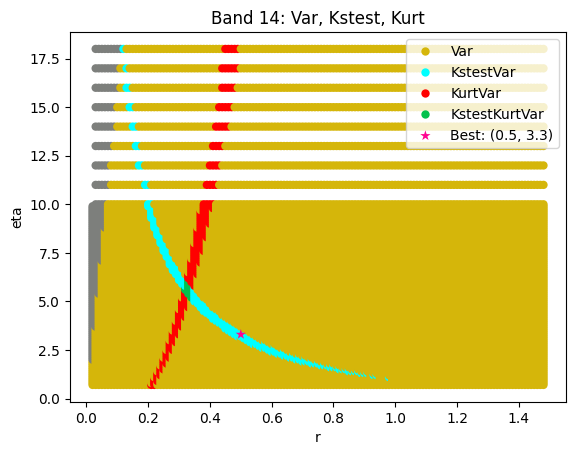

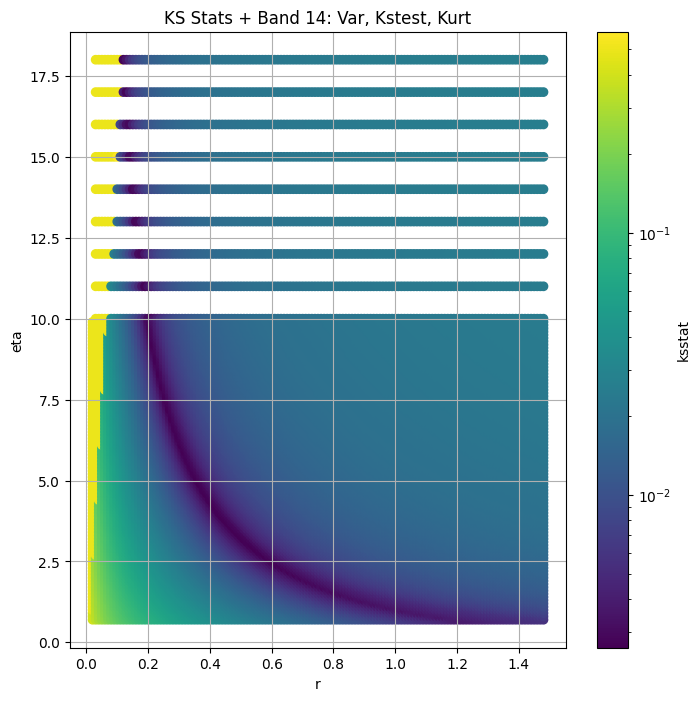

####
Band  17


100%|██████████| 55966/55966 [17:27<00:00, 53.41it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 257580.0


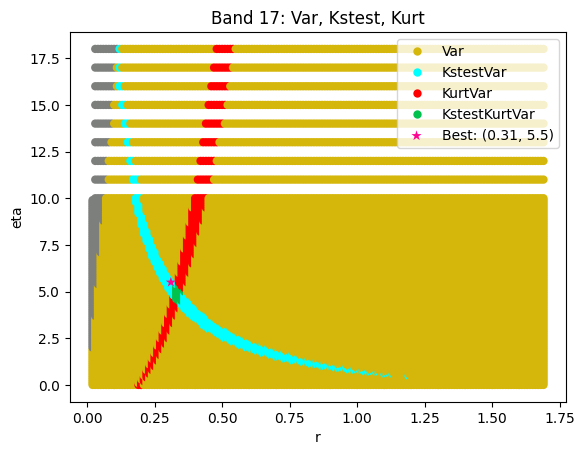

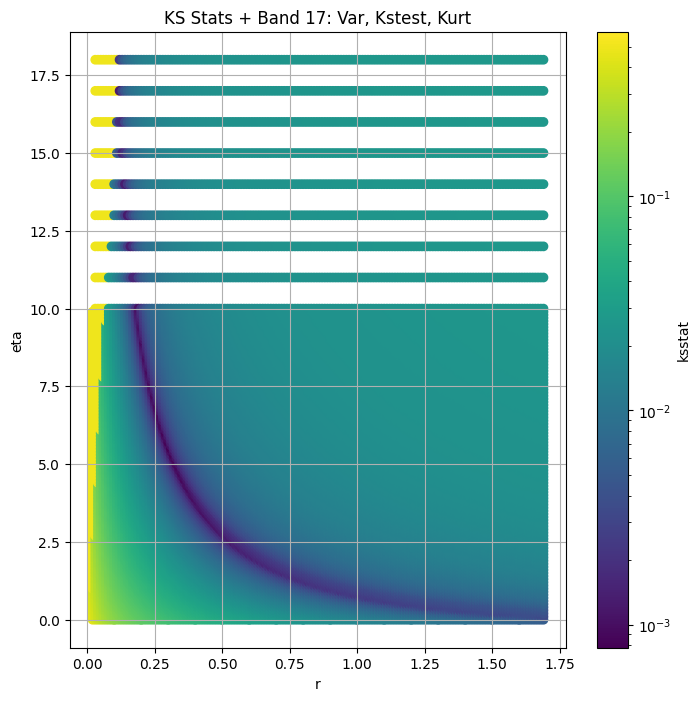

####
Band  20


100%|██████████| 55966/55966 [17:39<00:00, 52.85it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 381600.0


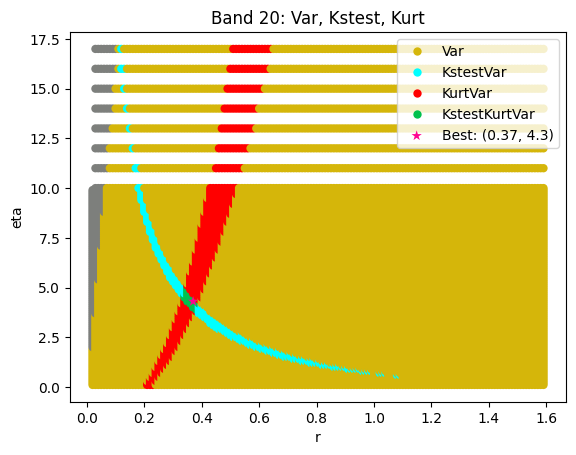

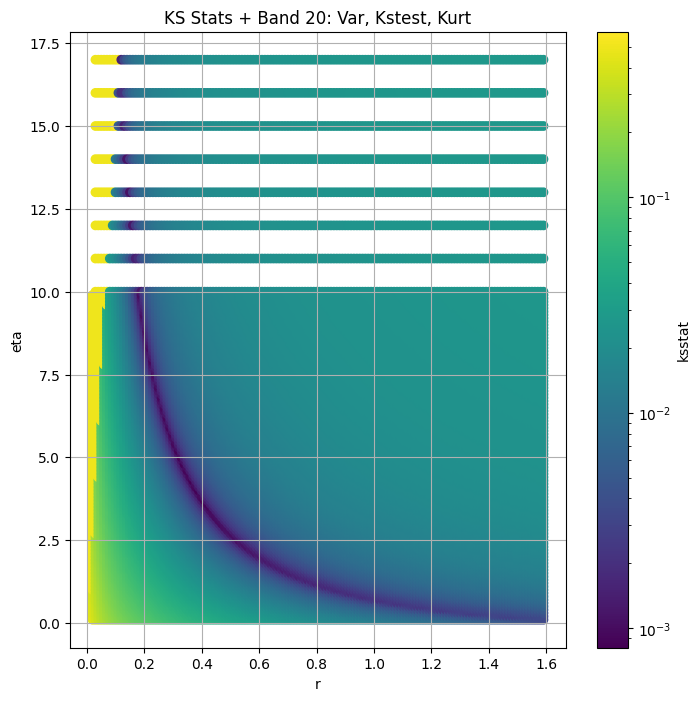

####
Band  23


100%|██████████| 55966/55966 [17:42<00:00, 52.65it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 610560.0


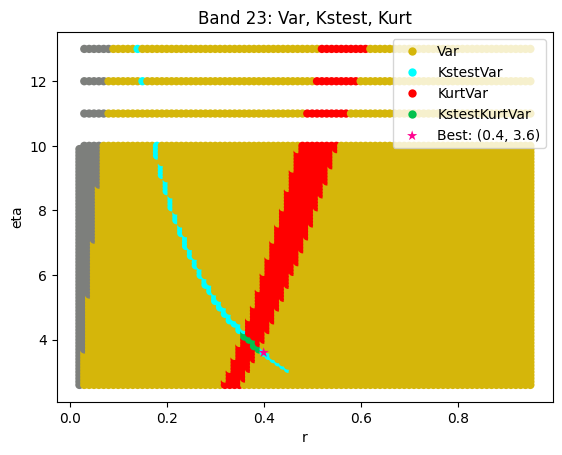

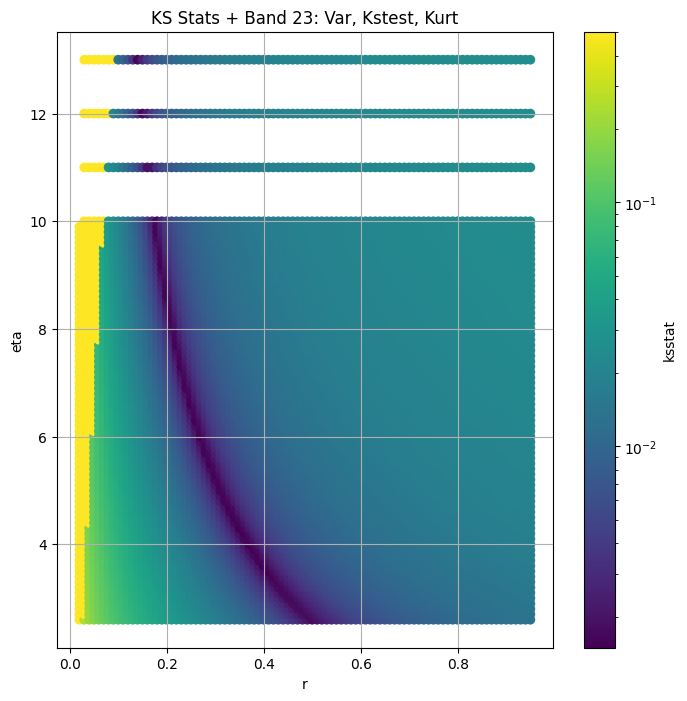

####
Band  26


100%|██████████| 55966/55966 [17:50<00:00, 52.27it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 973080.0


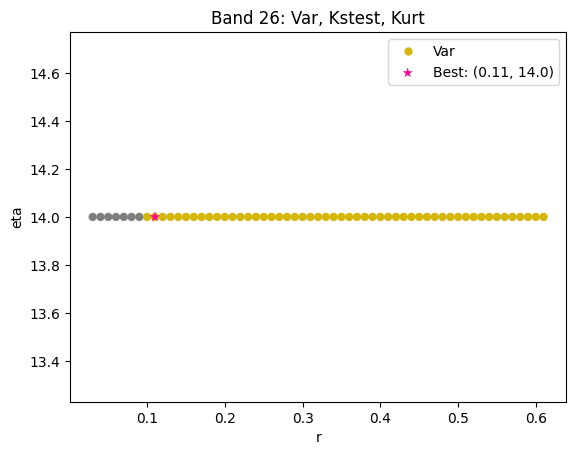

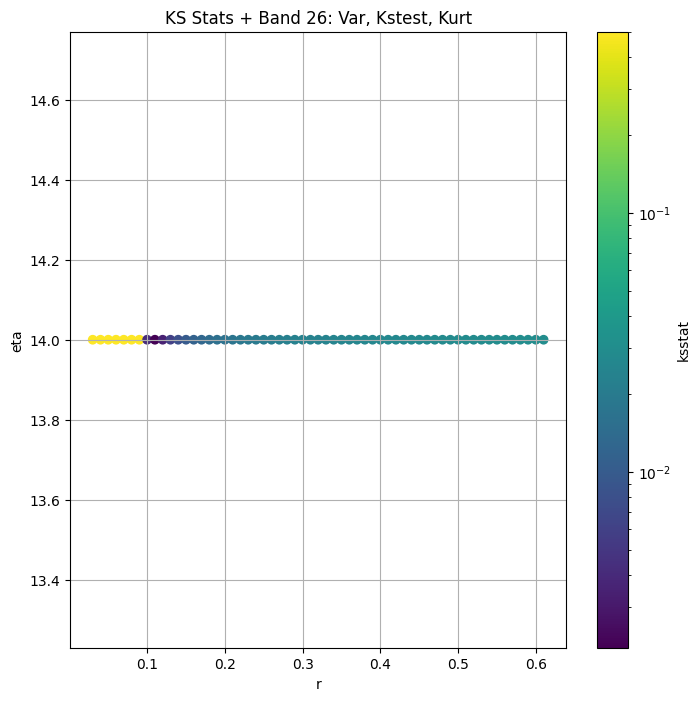

####
Band  29


100%|██████████| 55966/55966 [18:19<00:00, 50.91it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 1376940.0


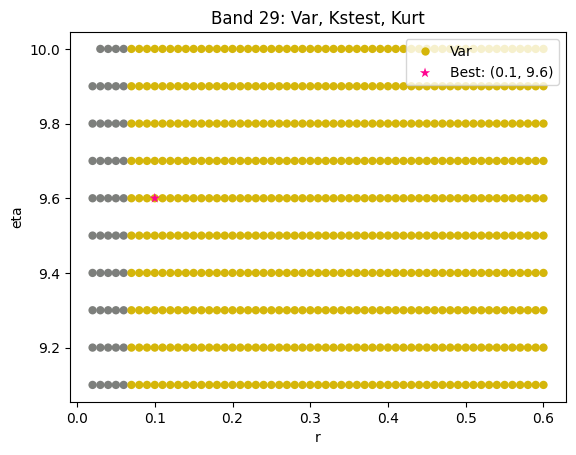

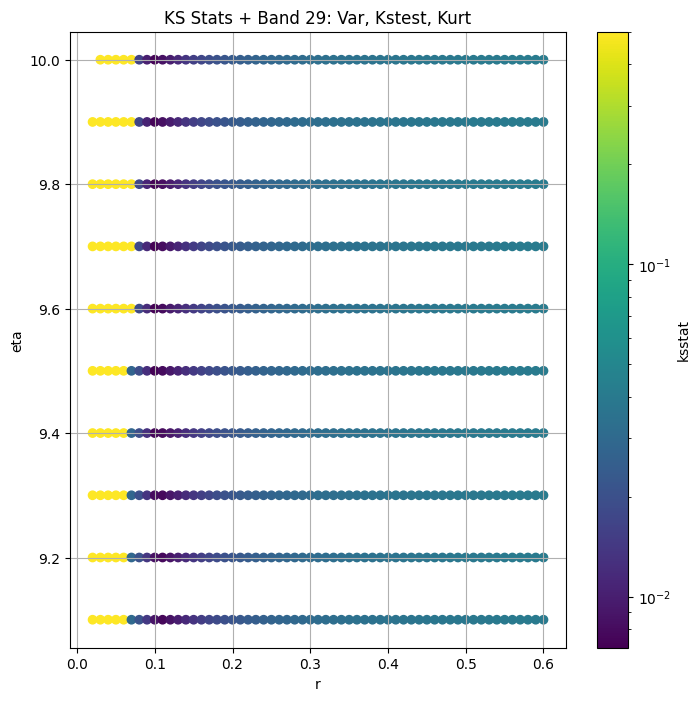

####
Band  32


100%|██████████| 55966/55966 [20:28<00:00, 45.56it/s] 


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 419760.0


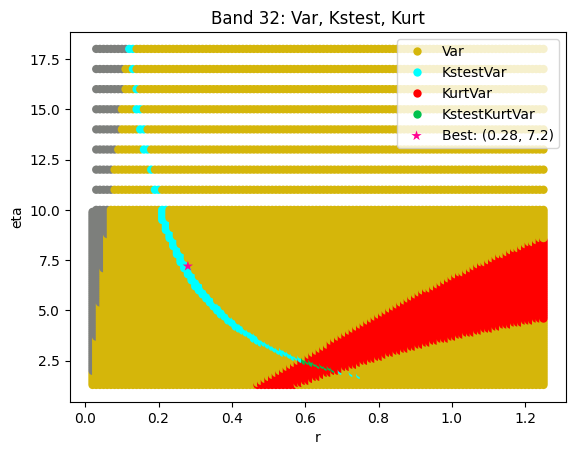

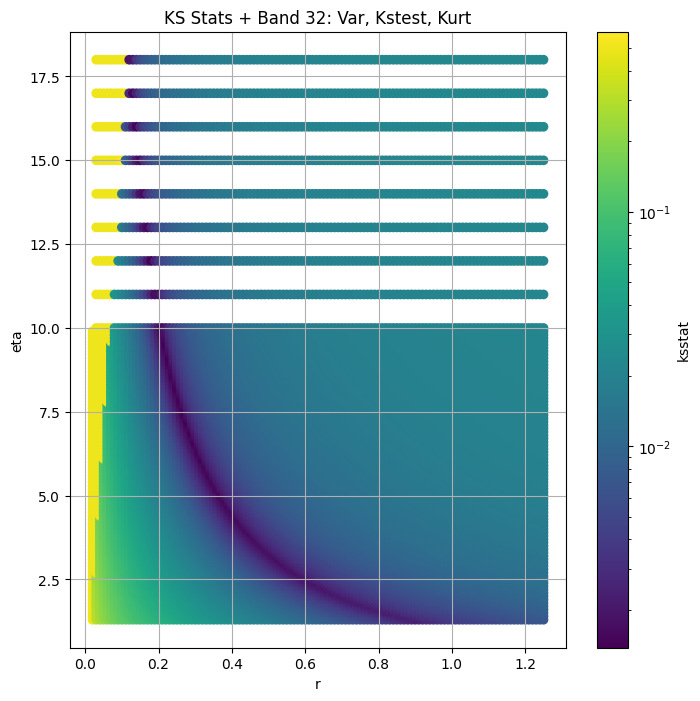

obs_var      var_lower     var_upper   obs_kurt  kurt_lower  \
band                                                                     
2     166042.38000  157998.030000  174433.44000   1.621352    1.183683   
5      88873.20000   84620.586000   93301.83600   1.556881    1.034867   
8      48739.90600   46426.742000   51128.37000   1.541575    1.065818   
11     27771.78000   26384.787000   29233.97300   1.922300    1.152667   
14     15175.32700   14446.183000   15943.68400   1.705795    1.083743   
17      8489.96700    8074.939500    8925.65700   1.771588    1.108579   
20      4270.11670    4059.782000    4497.97460   1.956200    1.143715   
23      2001.44800    1901.448400    2108.50070   2.041856    1.252694   
26       805.73254     756.140140     869.27690   5.035482    1.824682   
29       254.74072     229.878480     294.46872  20.922686    4.499840   
32        21.90403      20.869366      22.97642   1.474466    0.992683   

      kurt_upper  total_samples  initial_r  initial_eta  initial_scale  \
band                                                                     
2       2.159779        31800.0       0.21          8.6   1.354001e-03   
5       2.247035        41340.0       0.45          3.8   3.317746e+02   
8       2.175573        66780.0       0.13         17.0   1.115137e-12   
11      3.322009       104940.0       0.12         18.0   8.698513e-15   
14      3.005845       162180.0       0.50          3.3   1.491286e+02   
17      3.490519       257580.0       0.31          5.5   3.130361e-01   
20      5.900508       381600.0       0.37          4.3   2.183494e+00   
23      3.881752       610560.0       0.40          3.6   2.997886e+00   
26     19.982931       973080.0       0.11         14.0   1.816637e-17   
29     88.633370      1376940.0       0.10          9.6   6.048145e-19   
32      2.485555       419760.0       0.28          7.2   8.881771e-05   

      kstest_stat_initial  kstest_stat_cutoff_0.05  
band                                                
2                0.003456                 0.007611  
5                0.002581                 0.006675  
8                0.003249                 0.005253  
11               0.001690                 0.004191  
14               0.002605                 0.003371  
17               0.000779                 0.002675  
20               0.000811                 0.002198  
23               0.001493                 0.001738  
26               0.002097                 0.001377  
29               0.007042                 0.001157  
32               0.001380                 0.002096

In [ ]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        
        group_cdf_df['scale'] = np.clip(master_df.loc[group,'obs_var'] / group_cdf_df['variance'], 0, 1e5)
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True, scales=group_cdf_df['scale'])
        initial_scale = group_cdf_df.loc[(group_cdf_df["r"] ==  initial_param[0]) & (group_cdf_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        master_df.loc[group, 'initial_scale'] = initial_scale
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df['variance'] = group_cdf_df['variance'] * group_cdf_df['scale']
        group_cdf_df['kurtosis'] = group_cdf_df['kurtosis'] * group_cdf_df['scale']

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = None,
                            best_param = initial_param,
                            best_ksstat=min_stat
                            )
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=300)

        # Optional: 
        # Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

### Search over $\eta=0$

In [11]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

if RERUN or not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True, scales=group_cdf_df['scale'])
            best_scale_eta0 = group_cdf_df.loc[(group_cdf_df["r"] ==  best_param_eta0[0]) & (group_cdf_df["eta"] ==  best_param_eta0[1])]["scale"].iloc[0]
            master_df.loc[group, 'best_r_eta0'] = best_param_eta0[0]
            master_df.loc[group, 'best_scale_eta0'] = best_scale_eta0
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r_eta0'] = master_df.loc[group, 'initial_r']
            master_df.loc[group, 'best_scale_eta0'] = master_df.loc[group, 'initial_scale']
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

  0%|          | 0/369 [00:00<?, ?it/s]

100%|██████████| 369/369 [00:02<00:00, 159.14it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:04<00:00, 84.58it/s] 


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:06<00:00, 56.38it/s] 


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:07<00:00, 47.86it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:08<00:00, 44.01it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:08<00:00, 46.06it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:09<00:00, 39.74it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:07<00:00, 49.61it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:09<00:00, 39.61it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:07<00:00, 46.96it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:07<00:00, 47.36it/s]

Finding Minimum after computing 369 CDFs


obs_var      var_lower     var_upper   obs_kurt  kurt_lower  \
band                                                                     
2     166042.38000  157998.030000  174433.44000   1.621352    1.183683   
5      88873.20000   84620.586000   93301.83600   1.556881    1.034867   
8      48739.90600   46426.742000   51128.37000   1.541575    1.065818   
11     27771.78000   26384.787000   29233.97300   1.922300    1.152667   
14     15175.32700   14446.183000   15943.68400   1.705795    1.083743   
17      8489.96700    8074.939500    8925.65700   1.771588    1.108579   
20      4270.11670    4059.782000    4497.97460   1.956200    1.143715   
23      2001.44800    1901.448400    2108.50070   2.041856    1.252694   
26       805.73254     756.140140     869.27690   5.035482    1.824682   
29       254.74072     229.878480     294.46872  20.922686    4.499840   
32        21.90403      20.869366      22.97642   1.474466    0.992683   

      kurt_upper  total_samples  initial_r  initial_eta  initial_scale  \
band                                                                     
2       2.159779        31800.0       0.21          8.6   1.354001e-03   
5       2.247035        41340.0       0.45          3.8   3.317746e+02   
8       2.175573        66780.0       0.13         17.0   1.115137e-12   
11      3.322009       104940.0       0.12         18.0   8.698513e-15   
14      3.005845       162180.0       0.50          3.3   1.491286e+02   
17      3.490519       257580.0       0.31          5.5   3.130361e-01   
20      5.900508       381600.0       0.37          4.3   2.183494e+00   
23      3.881752       610560.0       0.40          3.6   2.997886e+00   
26     19.982931       973080.0       0.11         14.0   1.816637e-17   
29     88.633370      1376940.0       0.10          9.6   6.048145e-19   
32      2.485555       419760.0       0.28          7.2   8.881771e-05   

      kstest_stat_initial  kstest_stat_cutoff_0.05  best_r_eta0  \
band                                                              
2                0.003456                 0.007611         0.88   
5                0.002581                 0.006675         1.67   
8                0.003249                 0.005253         6.00   
11               0.001690                 0.004191         6.00   
14               0.002605                 0.003371         6.00   
17               0.000779                 0.002675         6.00   
20               0.000811                 0.002198         6.00   
23               0.001493                 0.001738         6.00   
26               0.002097                 0.001377         5.90   
29               0.007042                 0.001157         5.80   
32               0.001380                 0.002096         5.80   

      best_scale_eta0  kstest_stat_eta0  
band                                     
2           11.477331          0.010733  
5           26.450986          0.015475  
8           37.327069          0.028222  
11          37.327069          0.089244  
14          37.327069          0.151332  
17          37.327069          0.205521  
20          37.327069          0.262842  
23          37.327069          0.316418  
26          37.302277          0.368711  
29          37.275527          0.417430  
32          37.275527          0.468425

## Optimization

In [12]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Band 2


100%|██████████| 420/420 [00:02<00:00, 177.05it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 2 best parameters: ((0.212, 8.5), 0.0034492496272997553)


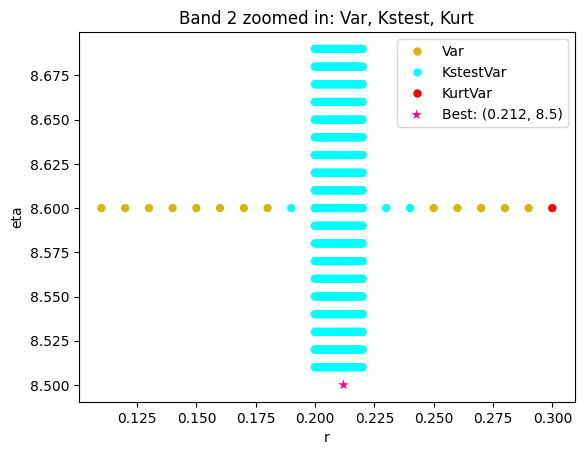

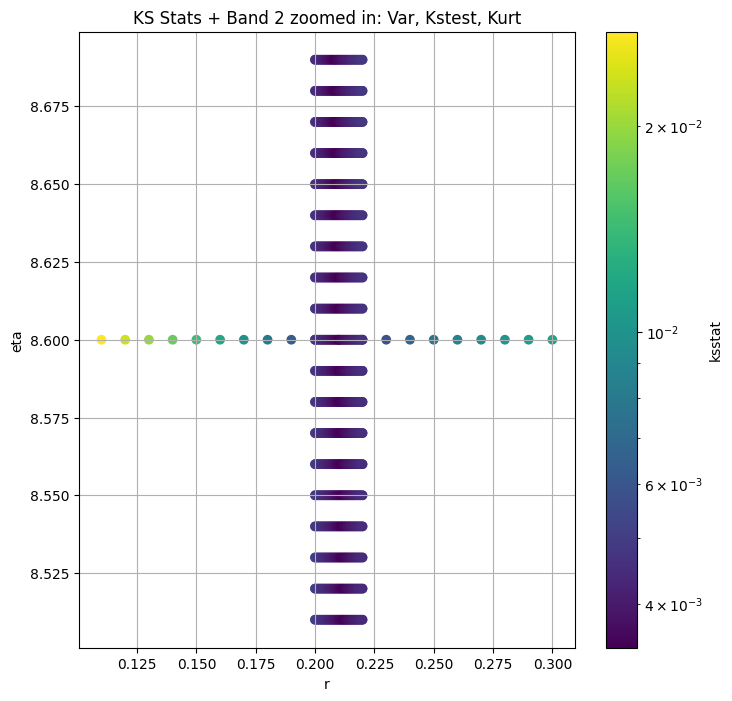

Band 5


100%|██████████| 441/441 [00:01<00:00, 227.51it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 5 best parameters: ((0.456, 3.73), 0.0025790467553511442)


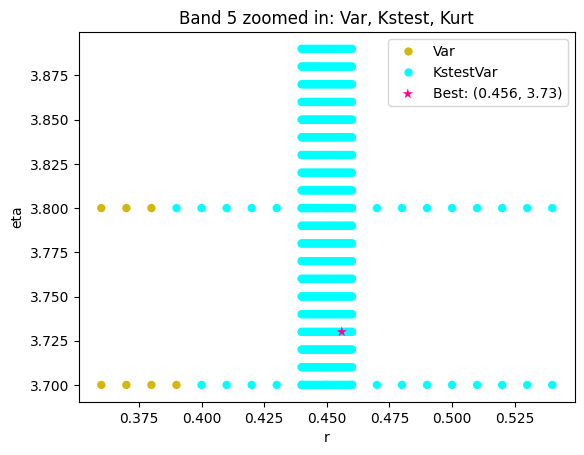

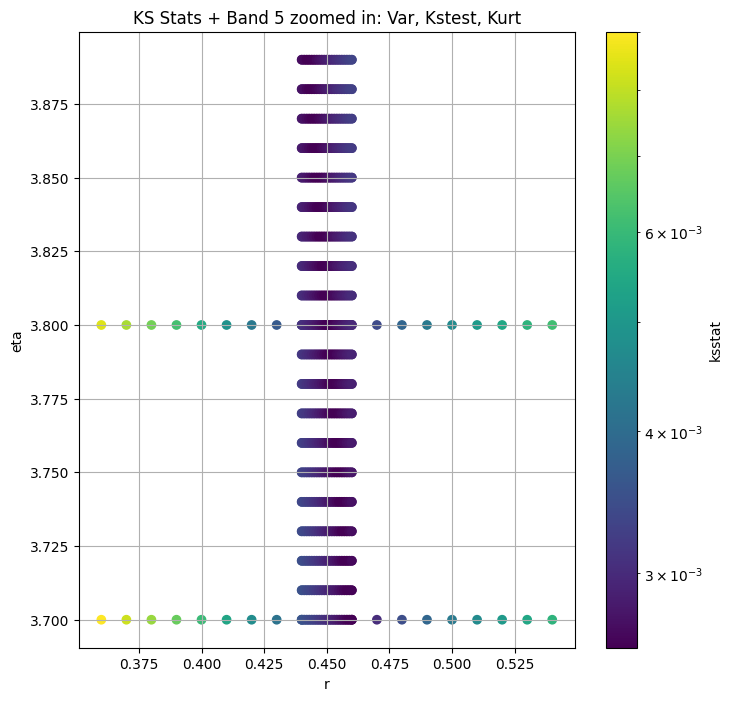

Band 8


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar power
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
100%|██████████| 420/420 [00:02<00:00, 148.29it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 8 best parameters: ((0.131, 16.9), 0.003219867060281545)


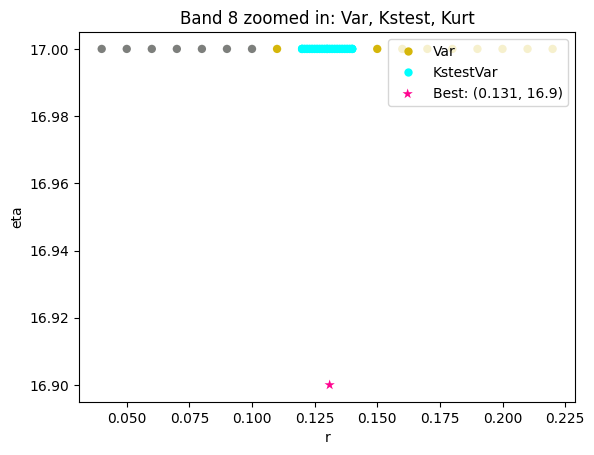

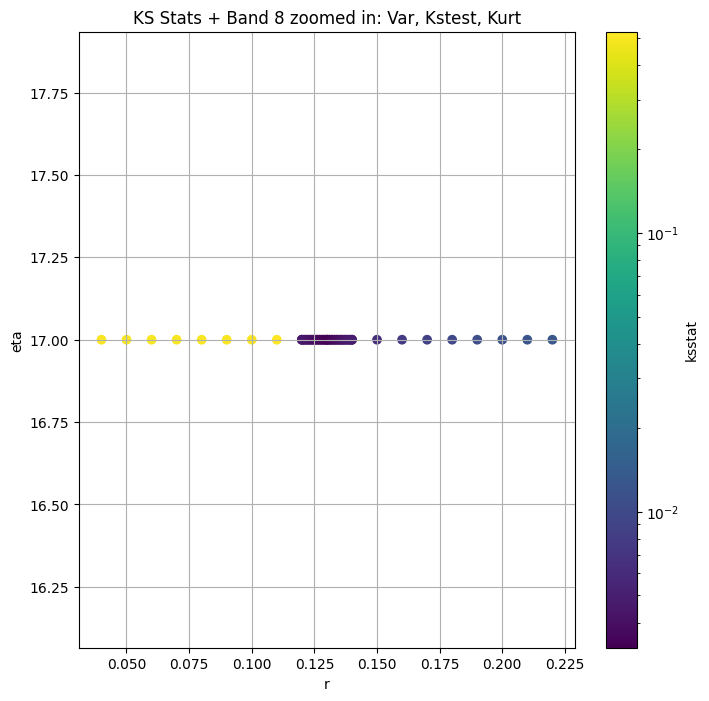

Band 11


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:582: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar power
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
100%|

Finding Minimum after computing 420 CDFs
Iter 1 band 11 best parameters: ((0.121, 17.9), 0.0016598349577322535)


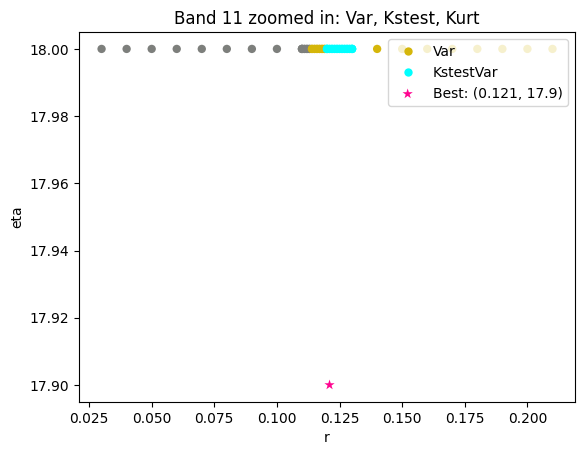

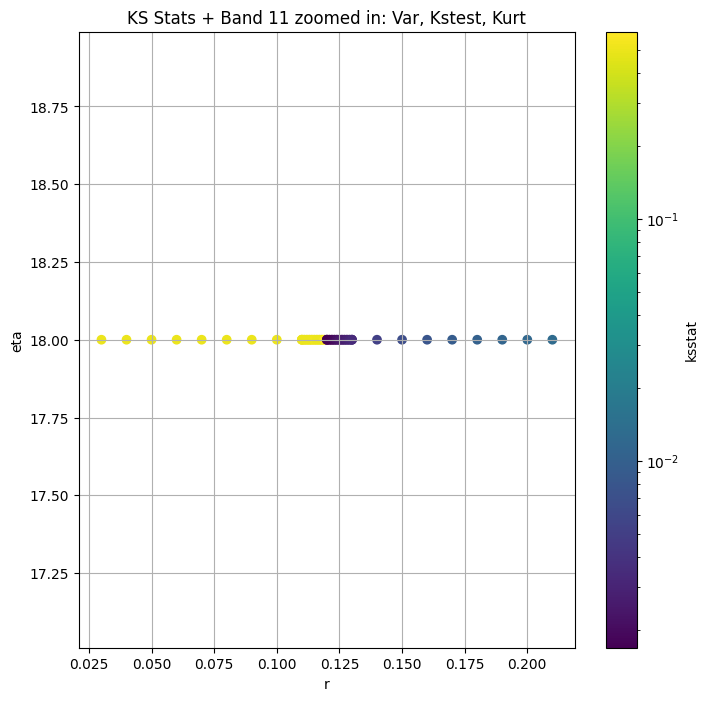

Band 14


100%|██████████| 441/441 [00:05<00:00, 86.65it/s] 


Finding Minimum after computing 441 CDFs
Iter 1 band 14 best parameters: ((0.504, 3.26), 0.002598825995250742)


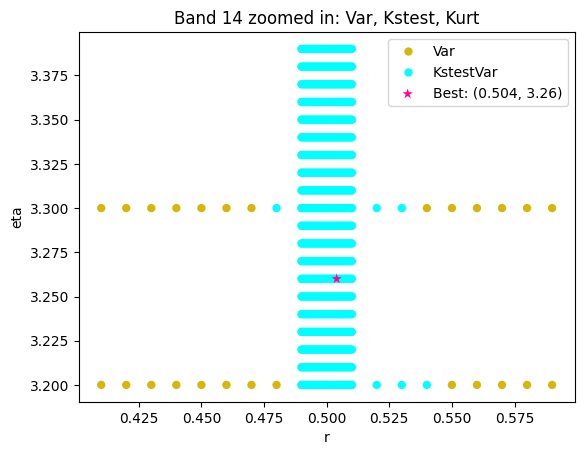

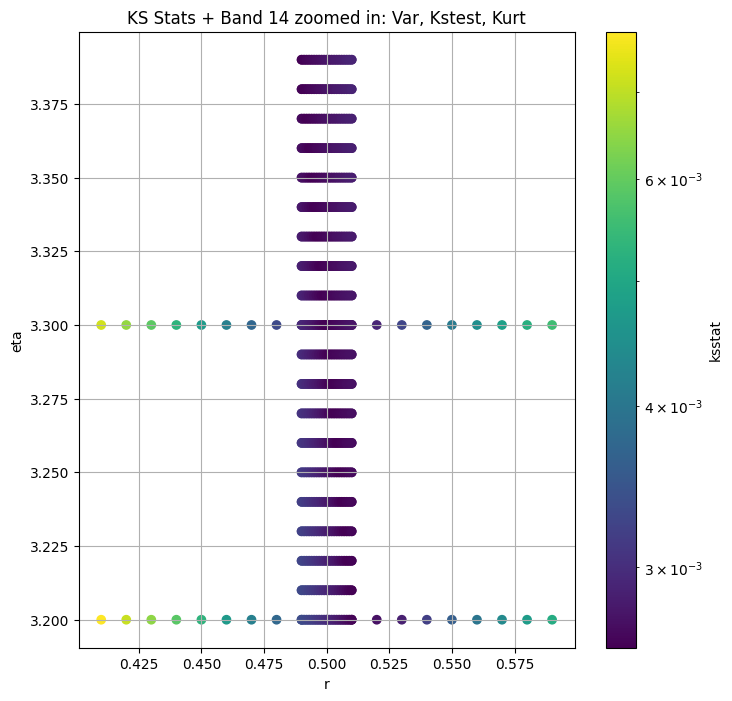

Band 17


100%|██████████| 420/420 [00:04<00:00, 85.93it/s] 


Finding Minimum after computing 420 CDFs
Iter 1 band 17 best parameters: ((0.312, 5.44), 0.000763504545107041)


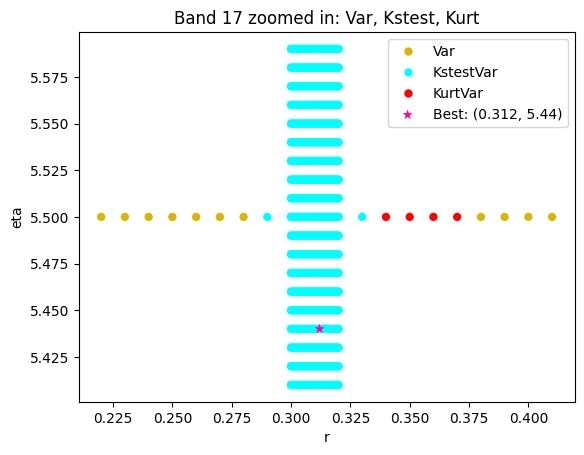

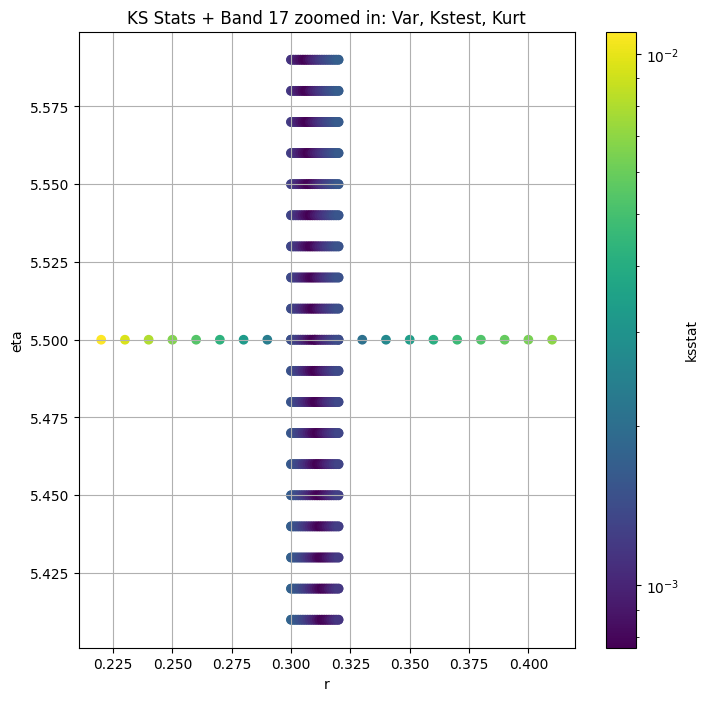

Band 20


100%|██████████| 420/420 [00:04<00:00, 87.81it/s] 


Finding Minimum after computing 420 CDFs
Iter 1 band 20 best parameters: ((0.364, 4.39), 0.0008023593120993766)


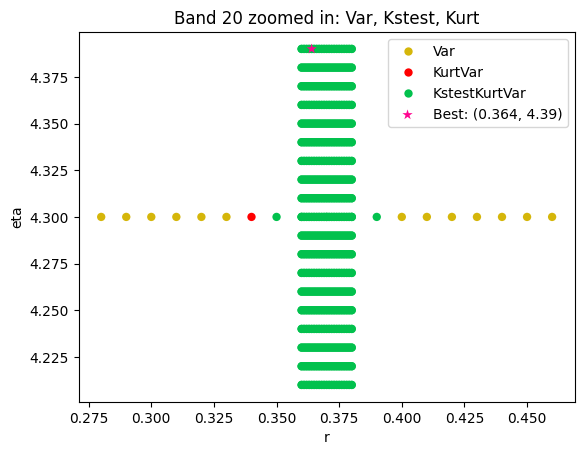

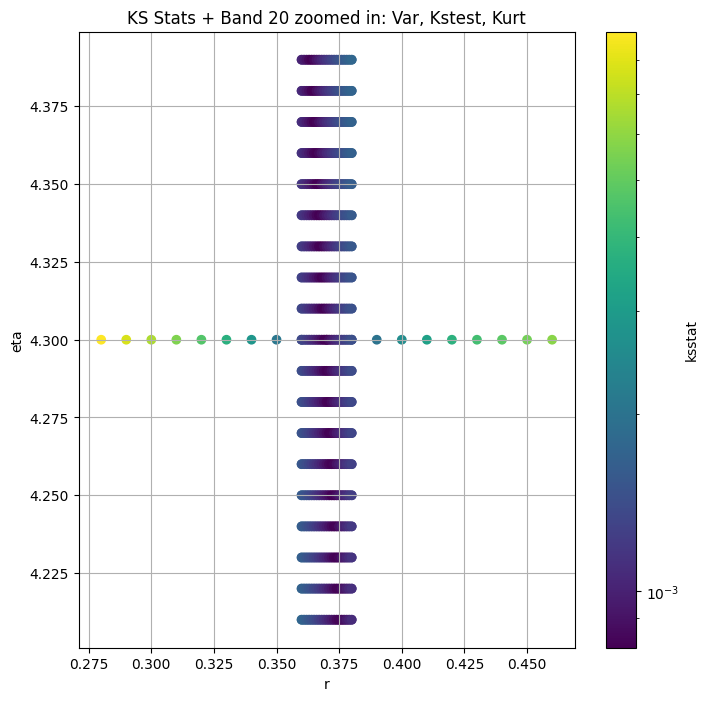

Band 23


100%|██████████| 441/441 [00:05<00:00, 87.17it/s] 


Finding Minimum after computing 441 CDFs
Iter 1 band 23 best parameters: ((0.408, 3.5), 0.001487221941683714)


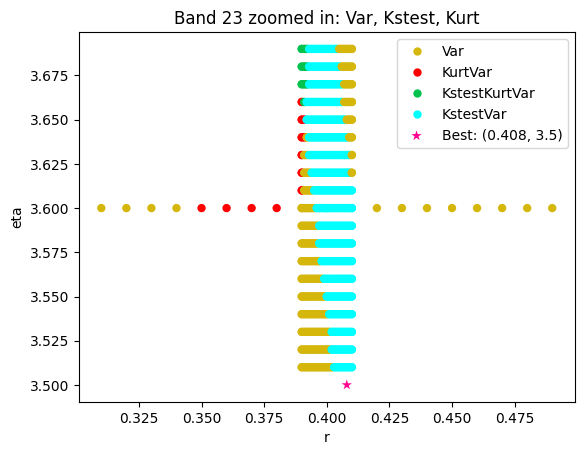

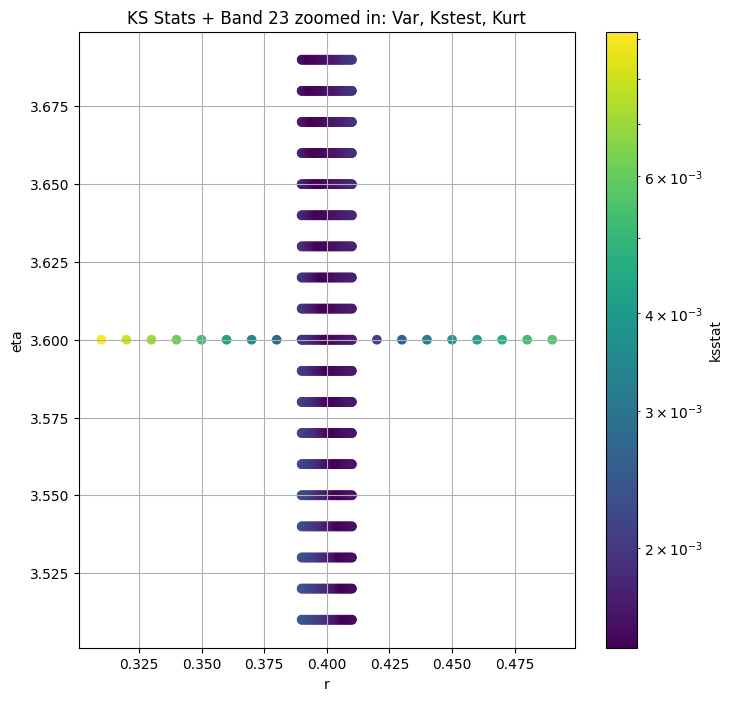

Band 26


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar power
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
100%|██████████| 400/400 [00:04<00:00, 97.16it/s] 
C:\Users\yashd\AppData\Local\Temp\ipykernel_44524\3557979055.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y

Finding Minimum after computing 400 CDFs
Iter 1 band 26 best parameters: ((0.102, 14.7), 0.0019698149796360115)


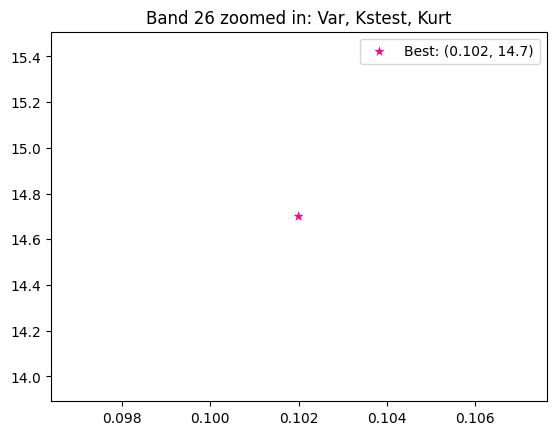

Band 29
(0.092, 9.59), 50 of 400
(0.094, 9.69), 100 of 400
(0.097, 9.59), 150 of 400
(0.099, 9.69), 200 of 400
(0.102, 9.59), 250 of 400
(0.104, 9.69), 300 of 400
(0.107, 9.59), 350 of 400
(0.109, 9.69), 400 of 400


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: overflow encountered in scalar power
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:590: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = scale*3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
100%|██████████| 400/400 [00:14<00:00, 26.75it/s]


Finding Minimum after computing 400 CDFs
Iter 1 band 29 best parameters: ((0.099, 9.64), 0.006984550666783371)


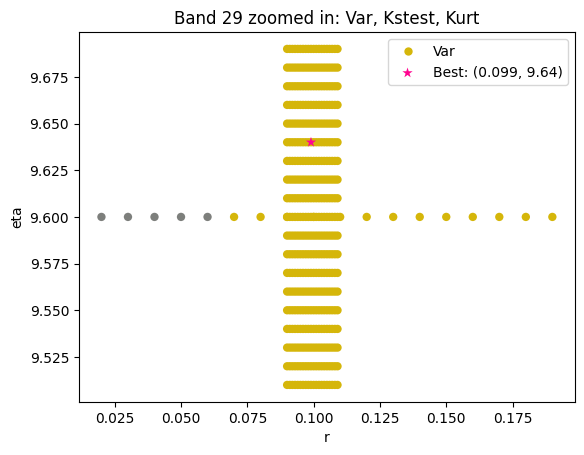

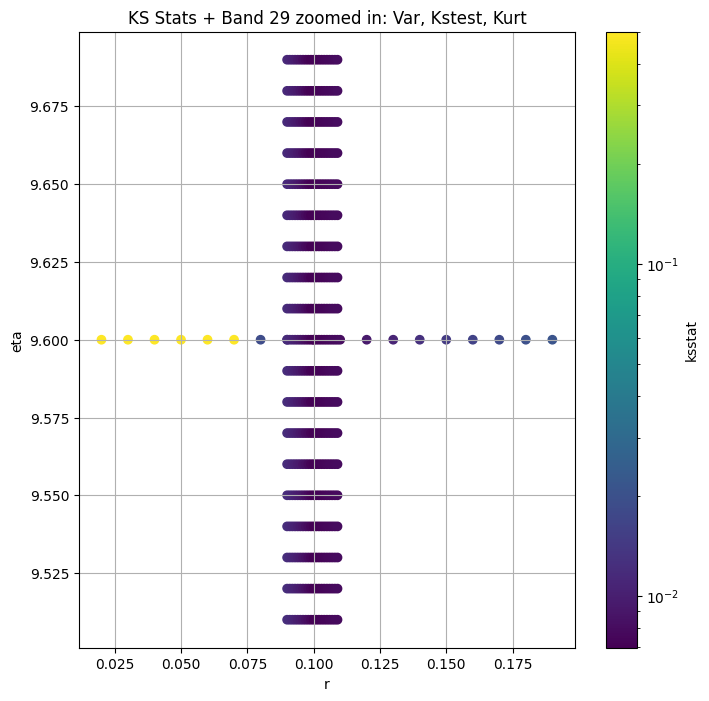

Band 32
(0.272, 7.19), 50 of 420
(0.274, 7.29), 100 of 420
(0.277, 7.19), 150 of 420
(0.279, 7.29), 200 of 420
(0.282, 7.19), 250 of 420
(0.284, 7.29), 300 of 420
(0.287, 7.19), 350 of 420
(0.289, 7.29), 400 of 420


100%|██████████| 420/420 [00:10<00:00, 41.22it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 32 best parameters: ((0.278, 7.27), 0.0013762139572077725)


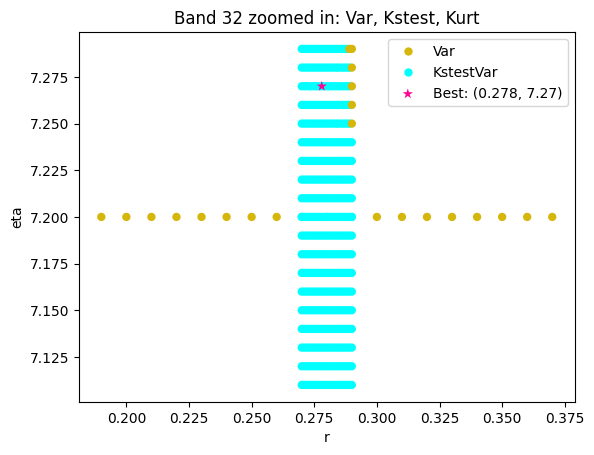

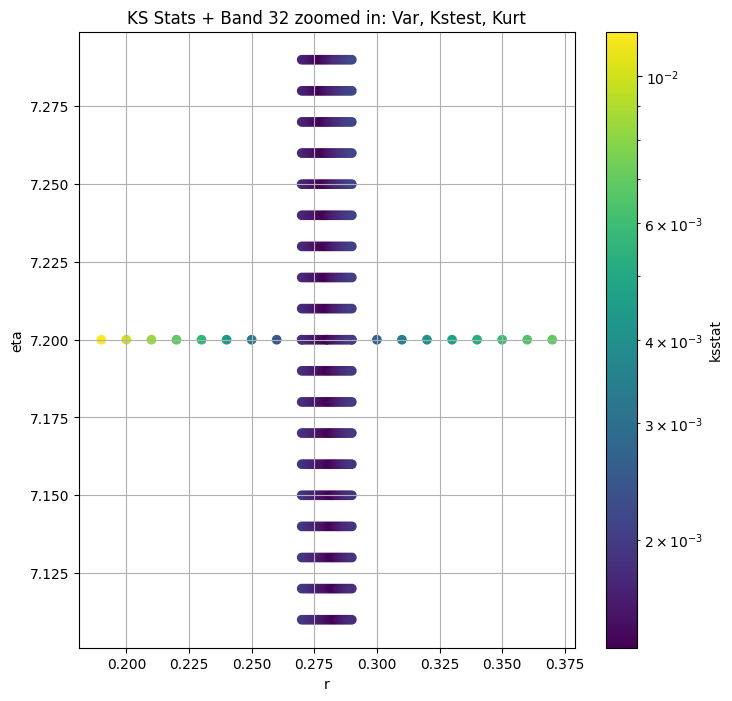

obs_var      var_lower     var_upper   obs_kurt  kurt_lower  \
band                                                                     
2     166042.38000  157998.030000  174433.44000   1.621352    1.183683   
5      88873.20000   84620.586000   93301.83600   1.556881    1.034867   
8      48739.90600   46426.742000   51128.37000   1.541575    1.065818   
11     27771.78000   26384.787000   29233.97300   1.922300    1.152667   
14     15175.32700   14446.183000   15943.68400   1.705795    1.083743   
17      8489.96700    8074.939500    8925.65700   1.771588    1.108579   
20      4270.11670    4059.782000    4497.97460   1.956200    1.143715   
23      2001.44800    1901.448400    2108.50070   2.041856    1.252694   
26       805.73254     756.140140     869.27690   5.035482    1.824682   
29       254.74072     229.878480     294.46872  20.922686    4.499840   
32        21.90403      20.869366      22.97642   1.474466    0.992683   

      kurt_upper  total_samples  initial_r  initial_eta  initial_scale  ...  \
band                                                                    ...   
2       2.159779        31800.0       0.21          8.6   1.354001e-03  ...   
5       2.247035        41340.0       0.45          3.8   3.317746e+02  ...   
8       2.175573        66780.0       0.13         17.0   1.115137e-12  ...   
11      3.322009       104940.0       0.12         18.0   8.698513e-15  ...   
14      3.005845       162180.0       0.50          3.3   1.491286e+02  ...   
17      3.490519       257580.0       0.31          5.5   3.130361e-01  ...   
20      5.900508       381600.0       0.37          4.3   2.183494e+00  ...   
23      3.881752       610560.0       0.40          3.6   2.997886e+00  ...   
26     19.982931       973080.0       0.11         14.0   1.816637e-17  ...   
29     88.633370      1376940.0       0.10          9.6   6.048145e-19  ...   
32      2.485555       419760.0       0.28          7.2   8.881771e-05  ...   

      best_scale_eta0  kstest_stat_eta0  best_r  best_eta    best_scale  \
band                                                                      
2           11.477331          0.010733   0.212      8.50  1.766721e-03   
5           26.450986          0.015475   0.456      3.73  3.784231e+02   
8           37.327069          0.028222   0.131     16.90  1.649705e-12   
11          37.327069          0.089244   0.121     17.90  1.381330e-14   
14          37.327069          0.151332   0.504      3.26  1.597971e+02   
17          37.327069          0.205521   0.312      5.44  3.504195e-01   
20          37.327069          0.262842   0.364      4.39  1.767486e+00   
23          37.327069          0.316418   0.408      3.50  3.749885e+00   
26          37.302277          0.368711   0.102     14.70  1.632393e-19   
29          37.275527          0.417430   0.099      9.64  3.264680e-19   
32          37.275527          0.468425   0.278      7.27  7.696692e-05   

      kstest_stat_best  iter1_r  iter1_eta  kstest_stat_iter1  n_pval_0.05  
band                                                                        
2             0.003449    0.212       8.50           0.003449       160987  
5             0.002579    0.456       3.73           0.002579       264873  
8             0.003220    0.131      16.90           0.003220       169036  
11            0.001660    0.121      17.90           0.001660       672372  
14            0.002599    0.504       3.26           0.002599       273678  
17            0.000764    0.312       5.44           0.000764      3300744  
20            0.000802    0.364       4.39           0.000802      2897775  
23            0.001487    0.408       3.50           0.001487       869332  
26            0.001970    0.102      14.70           0.001970       486540  
29            0.006985    0.099       9.64           0.006985        36304  
32            0.001376    0.278       7.27           0.001376       944460  

[11 rows x 23 columns]

In [ ]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))


SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    rEtaKsstats_dict = dict()

    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(0, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i, 8), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i, 8)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df['scale'] = np.clip(master_df.loc[group,'obs_var'] / temp_df['variance'], 0, 1e5)
                temp_df['variance'] = temp_df['variance'] * temp_df['scale']
                temp_df['kurtosis'] = temp_df['kurtosis'] * temp_df['scale']
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True, scales=temp_df['scale'])
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                best_scale = temp_df.loc[(temp_df["r"] ==  best_param[0])&(temp_df["eta"] ==  best_param[1])]["scale"].iloc[0]
                master_df.loc[group, 'best_scale'] = best_scale
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group].sort_values(['r', 'eta'])
            rEtaKsstats_dict[group] = [temp_df['r'], temp_df['eta'], temp_df['ksstat']]

            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']),
                                best_ksstat=kstest_stat)
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=300)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'best_r', 'best_eta', 'best_scale', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    pd.to_pickle(rEtaKsstats_dict, os.path.join(CWD, "cache", 'rEtaKsstats_dict.pickle'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

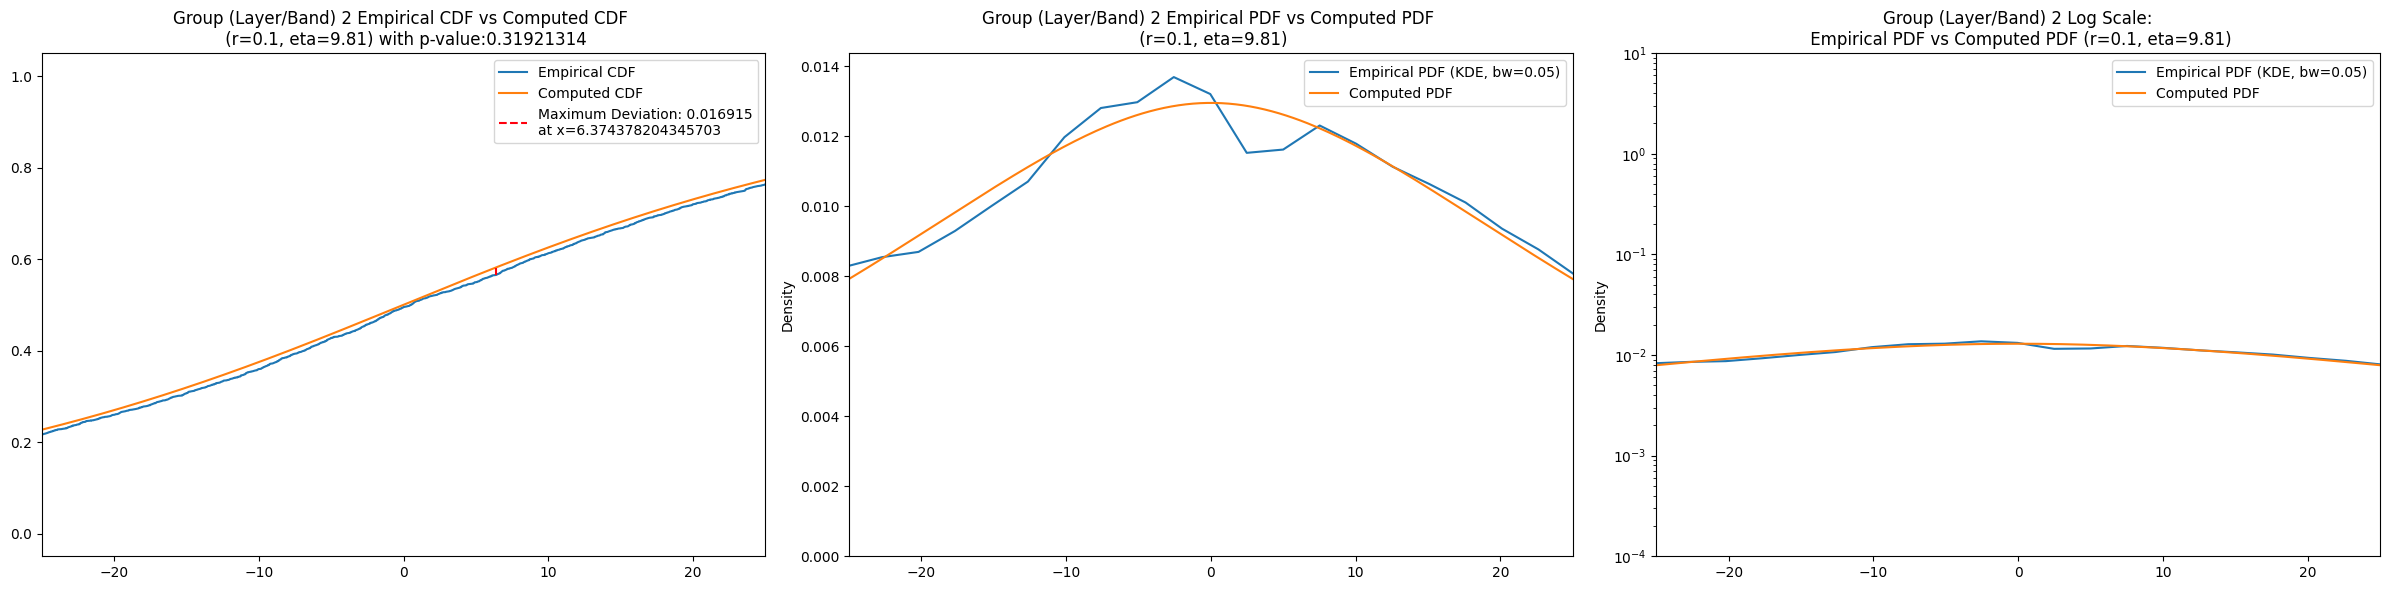

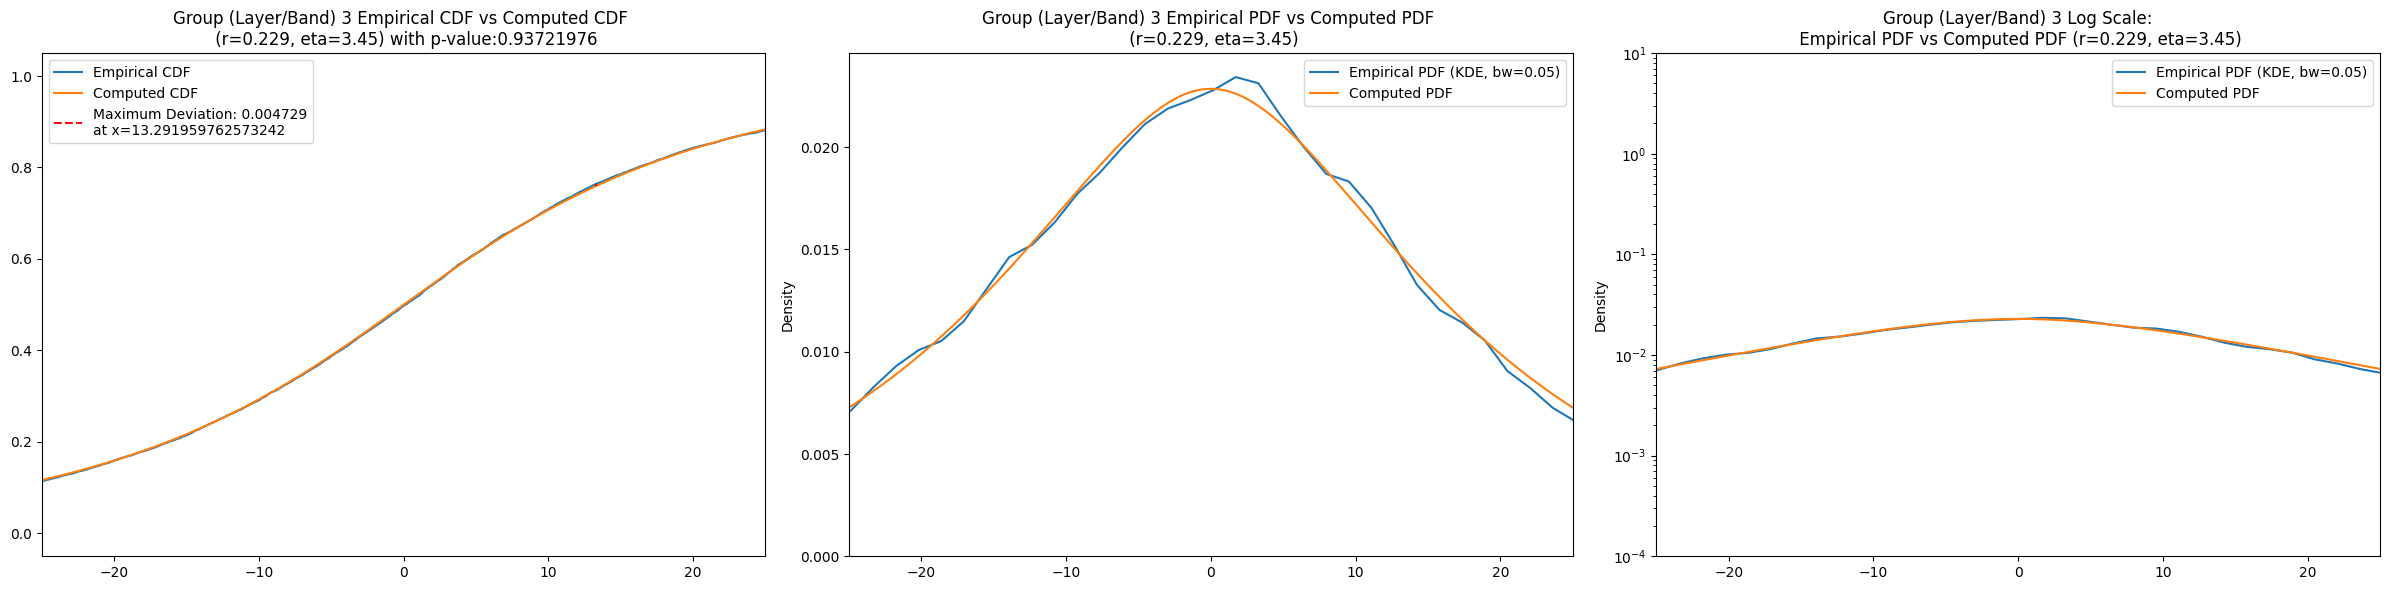

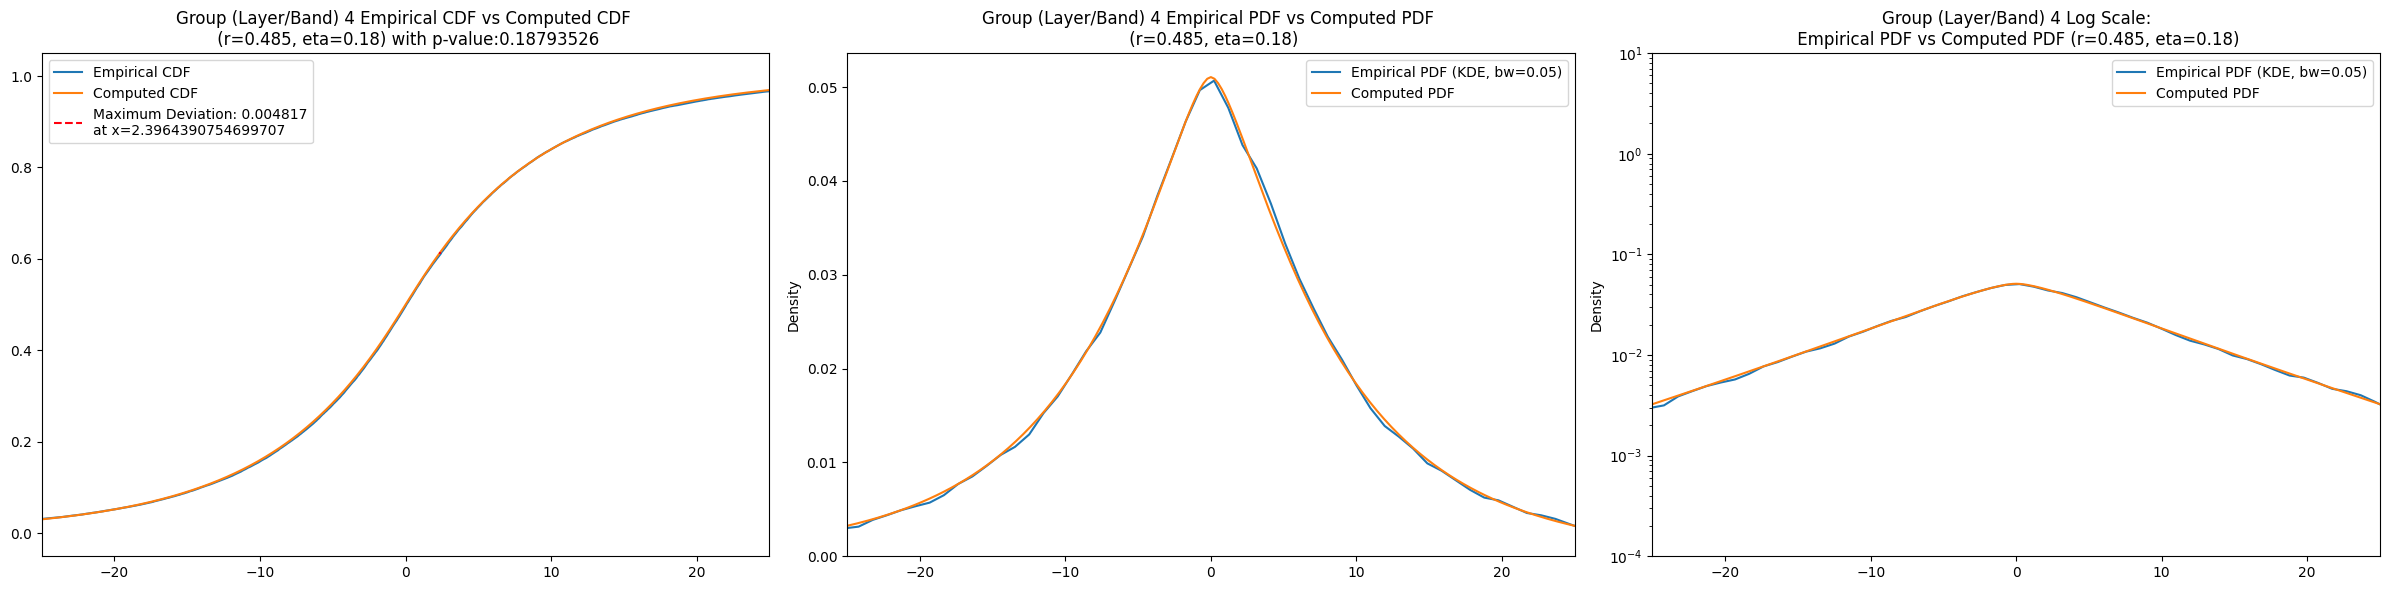

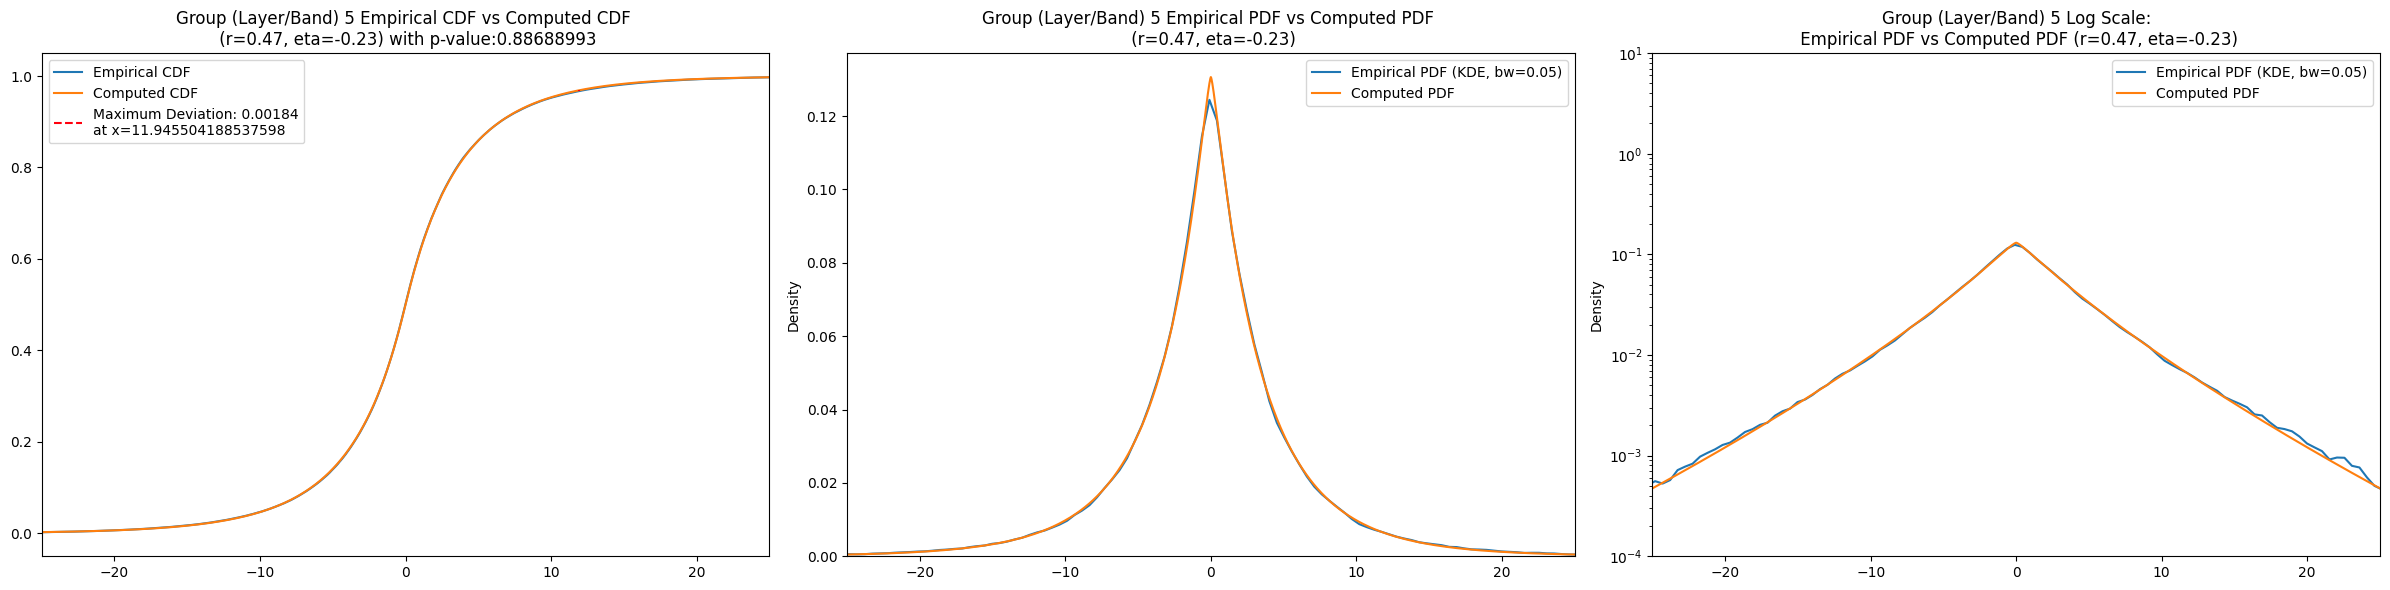

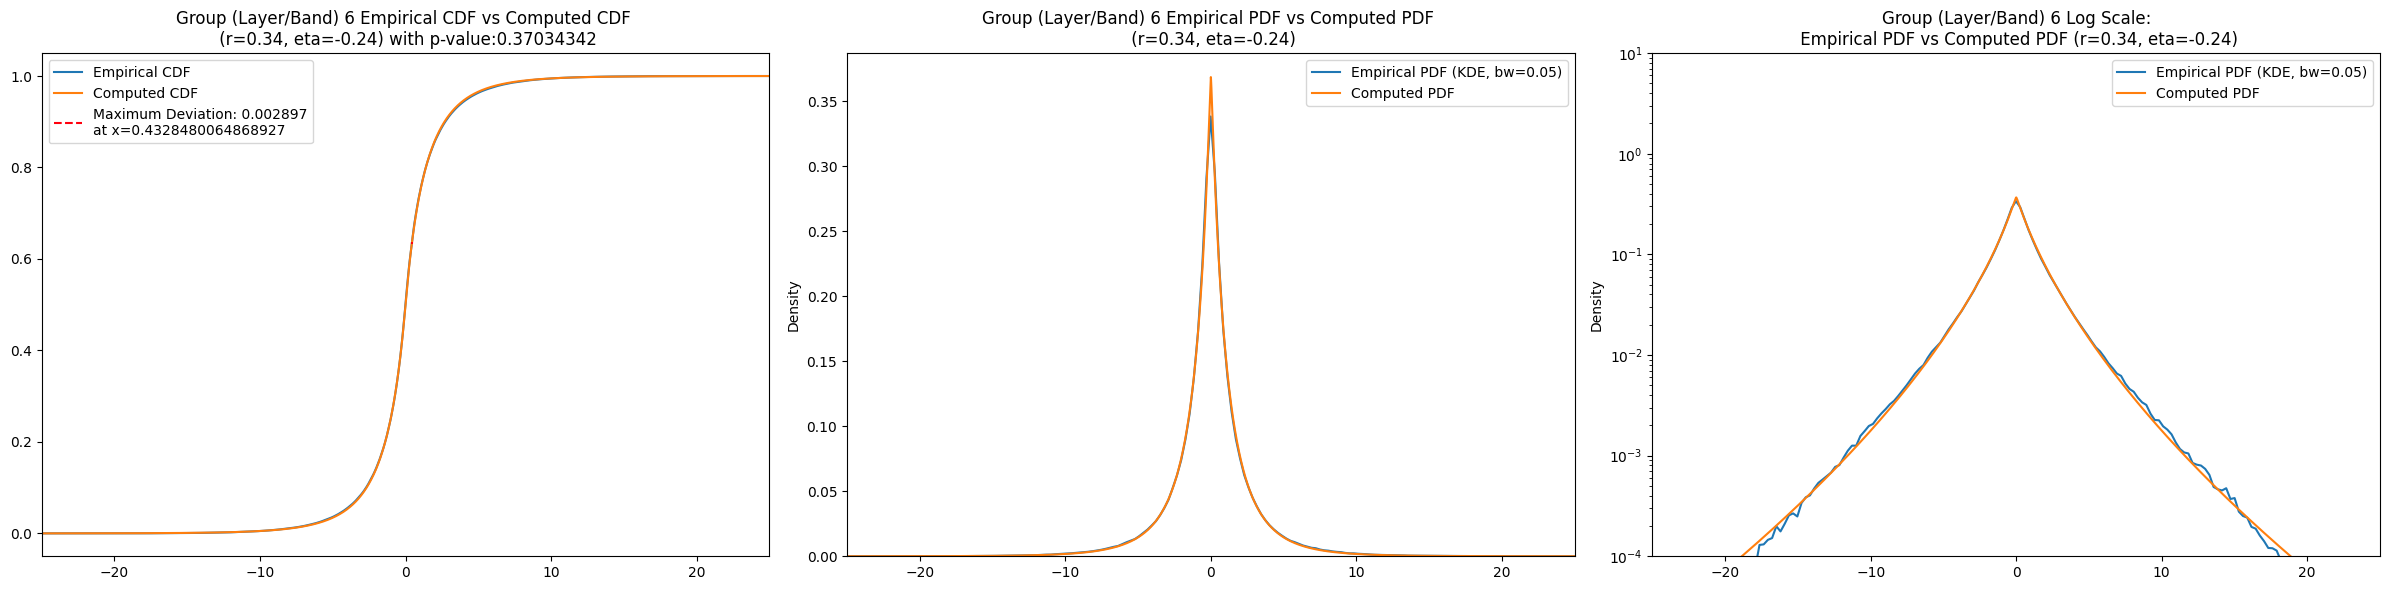

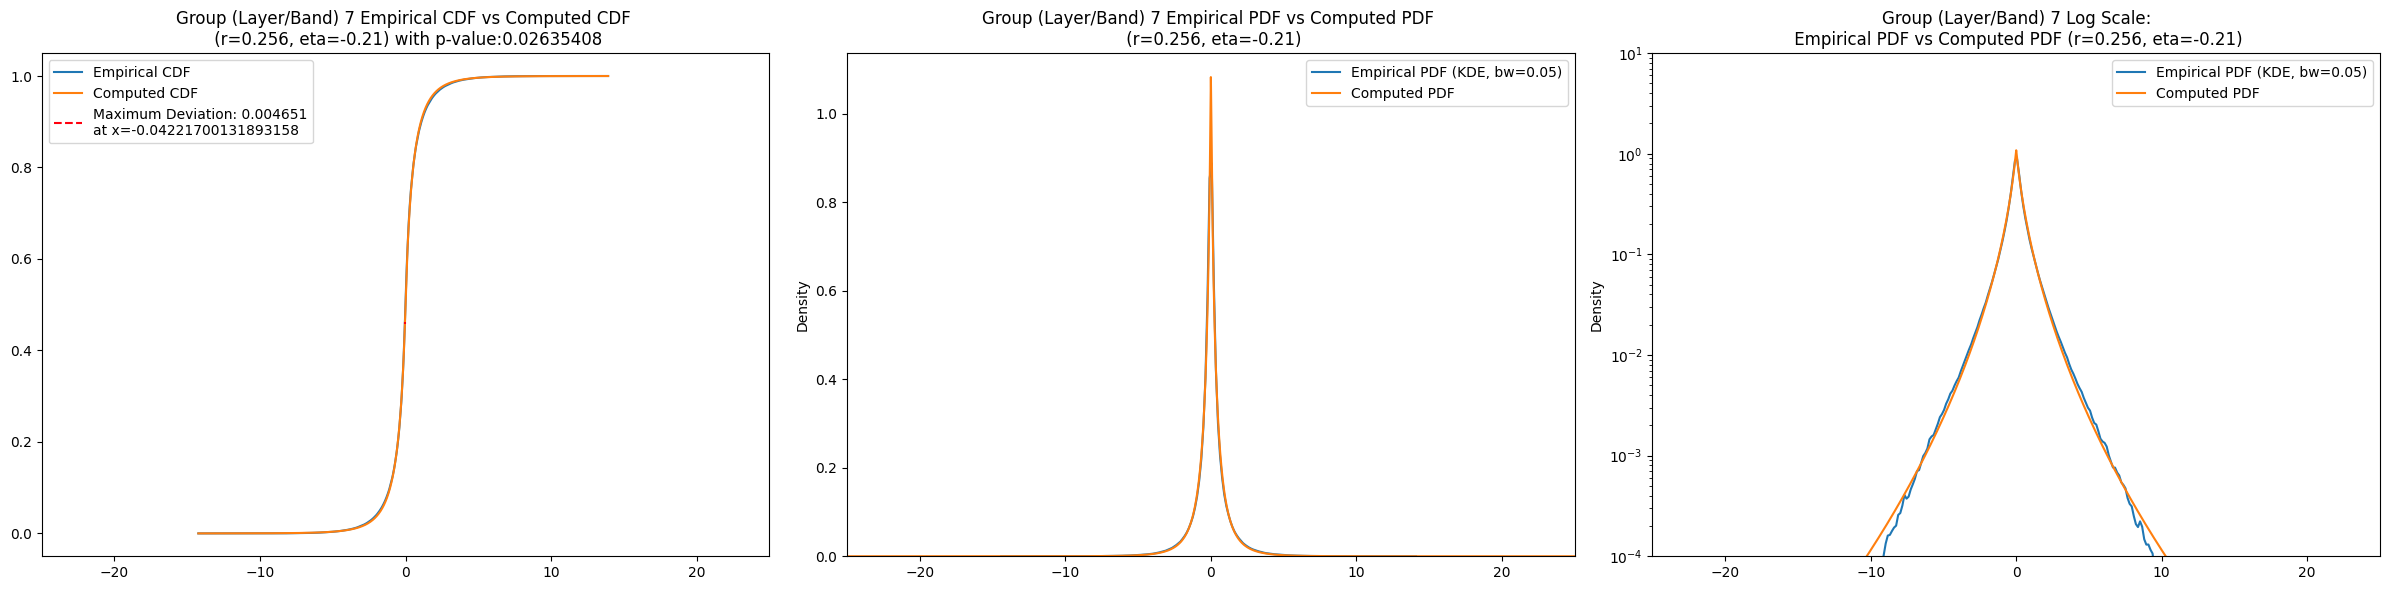

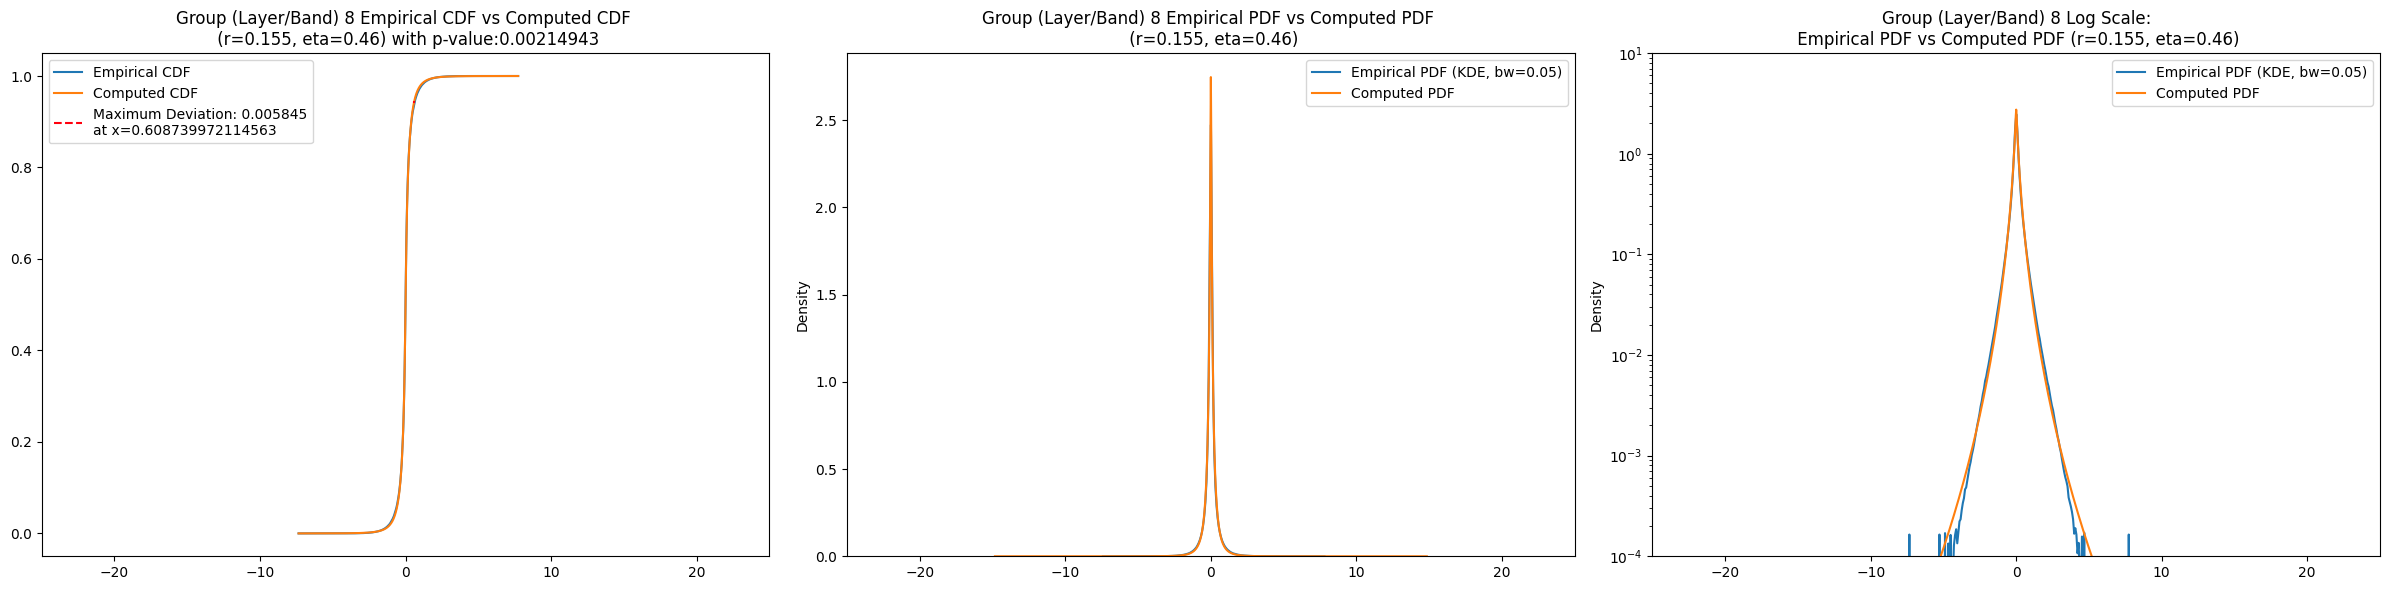

In [ ]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    best_scale = group_info['best_scale']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta, best_scale), 
                    log_scale = True,
                    group = group)
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace Priors

In [ ]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func
    elif distro == 'prior_with_scale':
        def r_eta_scale_func(params):
            r = params[0]
            eta = params[1]
            scale = params[2]
            cdf = compute_prior_cdf(r = r, eta = eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample / np.sqrt(scale), cdf)
        return r_eta_scale_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior','prior_with_scale', 't'")

In [ ]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var    var_lower    var_upper   obs_kurt  kurt_lower  \
layer                                                                 
2      1830.934600  1652.097700  2023.443800   2.933956    1.846394   
3       587.781860   556.332100   620.660600   2.604501    2.026207   
4       164.606740   154.984480   174.518840   3.278817    2.623241   
5        37.863530    35.388520    40.433693   4.789257    3.843992   
6         7.493805     6.929792     8.083941   6.740130    5.245897   
7         1.386997     1.272397     1.509542   9.084314    7.002164   
8         0.215883     0.196152     0.238341  12.285479    8.522737   

       kurt_upper  total_samples  initial_r  initial_eta  initial_scale  ...  \
layer                                                                    ...   
2        4.126091         3180.0       0.10          9.8   3.660938e-18  ...   
3        3.270645        12720.0       0.23          3.4   7.130501e-04  ...   
4        4.093916        50880.0       0.48          0.2   8.935552e+00  ...   
5        5.925406       203520.0       0.46         -0.2   2.703940e+00  ...   
6        8.892210       814080.0       0.33         -0.2   6.127773e-02  ...   
7       12.550997      3256320.0       0.25         -0.2   7.286756e-04  ...   
8       23.484678     13025280.0       0.16          0.4   1.248581e-08  ...   

       param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
layer                                                               
2           35.216400              0.031319          3.822010e-03   
3           20.655700              0.024528          4.427450e-07   
4           10.162300              0.031252          1.316840e-43   
5            4.515610              0.035460         8.879240e-223   
6            1.793070              0.044345          0.000000e+00   
7            0.681966              0.052539          0.000000e+00   
8            0.251257              0.054679          0.000000e+00   

       param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
layer                                                                       
2          32.501200             0.024581         4.216010e-02  26.626000   
3          18.039900             0.011071         8.783090e-02  14.504400   
4           8.964780             0.006986         1.386960e-02   7.271780   
5           3.970110             0.008324         1.122440e-12   3.217430   
6           1.573310             0.016709        7.339210e-198   1.264930   
7           0.598612             0.025074         0.000000e+00   0.477583   
8           0.221562             0.027676         0.000000e+00   0.175920   

       kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
layer                                                      
2           0.019259   1.864510e-01          3.192131e-01  
3           0.013417   2.033730e-02          9.372197e-01  
4           0.009676   1.446960e-04          1.879365e-01  
5           0.011171   1.721960e-22          4.958086e-01  
6           0.018767  1.707540e-249          2.330435e-06  
7           0.025556   0.000000e+00          1.315158e-61  
8           0.025922   0.000000e+00          0.000000e+00  

[7 rows x 33 columns]

## Results

In [ ]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [ ]:
master_df

obs_var    var_lower    var_upper   obs_kurt  kurt_lower  \
layer                                                                 
2      1830.934600  1652.097700  2023.443800   2.933956    1.846394   
3       587.781860   556.332100   620.660600   2.604501    2.026207   
4       164.606740   154.984480   174.518840   3.278817    2.623241   
5        37.863530    35.388520    40.433693   4.789257    3.843992   
6         7.493805     6.929792     8.083941   6.740130    5.245897   
7         1.386997     1.272397     1.509542   9.084314    7.002164   
8         0.215883     0.196152     0.238341  12.285479    8.522737   

       kurt_upper  total_samples  initial_r  initial_eta  initial_scale  ...  \
layer                                                                    ...   
2        4.126091         3180.0       0.10          9.8   3.660938e-18  ...   
3        3.270645        12720.0       0.23          3.4   7.130501e-04  ...   
4        4.093916        50880.0       0.48          0.2   8.935552e+00  ...   
5        5.925406       203520.0       0.46         -0.2   2.703940e+00  ...   
6        8.892210       814080.0       0.33         -0.2   6.127773e-02  ...   
7       12.550997      3256320.0       0.25         -0.2   7.286756e-04  ...   
8       23.484678     13025280.0       0.16          0.4   1.248581e-08  ...   

       param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
layer                                                               
2           35.216400              0.031319          3.822010e-03   
3           20.655700              0.024528          4.427450e-07   
4           10.162300              0.031252          1.316840e-43   
5            4.515610              0.035460         8.879240e-223   
6            1.793070              0.044345          0.000000e+00   
7            0.681966              0.052539          0.000000e+00   
8            0.251257              0.054679          0.000000e+00   

       param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
layer                                                                       
2          32.501200             0.024581         4.216010e-02  26.626000   
3          18.039900             0.011071         8.783090e-02  14.504400   
4           8.964780             0.006986         1.386960e-02   7.271780   
5           3.970110             0.008324         1.122440e-12   3.217430   
6           1.573310             0.016709        7.339210e-198   1.264930   
7           0.598612             0.025074         0.000000e+00   0.477583   
8           0.221562             0.027676         0.000000e+00   0.175920   

       kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
layer                                                      
2           0.019259   1.864510e-01          3.192131e-01  
3           0.013417   2.033730e-02          9.372197e-01  
4           0.009676   1.446960e-04          1.879365e-01  
5           0.011171   1.721960e-22          4.958086e-01  
6           0.018767  1.707540e-249          2.330435e-06  
7           0.025556   0.000000e+00          1.315158e-61  
8           0.025922   0.000000e+00          0.000000e+00  

[7 rows x 33 columns]

In [ ]:
eng.quit()
remove_directory(os.path.join(CWD, "groupCDFs"))